In [2]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot

In [3]:
hists={}
pd = []
year = '2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]

In [4]:
pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

In [5]:
scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8 54247036.39575195
ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8 16585005824.5
TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8 297176184920.0
QCD_HT100to200_TuneCP5_13TeV-madgraphMLM-pythia8 93948237.30664062
ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8 5109802011.3125
WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 5913597.69140625
ZJetsToNuNu_HT-200To400_13TeV-madgraph 23232889.49609375
WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8 7567071.1328125
DYJetsToLL_M-50_HT-400to600_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 9614508.69140625
QCD_HT2000toInf_TuneCP5_13TeV-madgraphMLM-pythia8 5412264.462890625
GJets_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 4650962.65625
ZZ_TuneCP5_13TeV-pythia8 1978776.73828125
ZJetsToNuNu_HT-600To800_13TeV-madgraph 5726462.8671875
GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 19051574.2890625
WJetsToLNu_HT-200To400_TuneCP5_13T

In [6]:
process = hist.Cat("process", "Process", sorting='placement')

process_cats = ("pdataset",)
process_map = OrderedDict()
#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["DY"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)
process_map["ZJets"] = ("ZJetsToNuNu*",)   ## temporarily 

signal_cats = ("pdataset",)
signal_map = OrderedDict() ### for signal samples
signal_map["Mhs_50"] = ("*Mhs_50*",)  ## signals
signal_map["Mhs_70"] = ("*Mhs_70*",)
signal_map["Mhs_90"] = ("*Mhs_90*",)
signal_map["MonoJet"] = ("MonoJet*",)  ## signals
signal_map["MonoW"] = ("MonoW*",)    ## signals
signal_map["MonoZ"] = ("MonoZ*",)    ## signals
signal_hists = {}

for key in hists.keys():
    signal_hists[key] = hists[key].group(process, signal_cats, signal_map)
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)

sumw
CaloMinusPfOverRecoil
recoil
mindphi
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
ndcsvL
ndflvL
ndcsvM
ndflvM
ndcsvT
ndflvT
nfjtot
nfjgood
nfjclean
fjmass
e1pt
e1eta
e1phi
mu1pt
mu1eta
mu1phi
TopTagger
DarkHiggsTagger
VvsQCDTagger
probTbcq
probTbqq
probTbc
probTbq
probWcq
probWqq
probZbb
probZcc
probZqq
probHbb
probHcc
probHqqqq
probQCDbb
probQCDcc
probQCDb
probQCDc
probQCDothers


In [7]:
data_hists={}
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [8]:
data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("EGamma*", )
data_map["SinglePhoton"] = ("EGamma*", )
data_cats = ("dataset",)
for key in data_hists.keys():
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

In [11]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [9]:
exp = 0
region = 'iszeroL'
jet_selection = 'skinny'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
for p in signal_hists['recoil'].identifiers('process'):
    yld = np.sum(signal_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    print(p, '%.1f' % yld)
    
print('------------------')
print('Total expected:', '%.1f' % exp)
#print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 207.0
DY 4179.9
Diboson 11794.6
ST 5977.4
TT 43147.5
Wjets 311136.3
ZJets 572114.0
Mhs_50 14762.4
Mhs_70 15275.3
Mhs_90 16124.9
MonoJet 22372.5
MonoW 19908.8
MonoZ 20411.5
------------------
Total expected: 948556.8
------------------
------------------



In [10]:
exp = 0
region = 'iszeroL'
jet_selection = 'baggy'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
for p in signal_hists['recoil'].identifiers('process'):
    yld = np.sum(signal_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    print(p, '%.1f' % yld)
    
print('------------------')
print('Total expected:', '%.1f' % exp)
#print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 189.6
DY 3757.7
Diboson 10779.9
ST 4420.6
TT 28679.3
Wjets 278040.0
ZJets 528115.7
Mhs_50 14315.5
Mhs_70 14829.6
Mhs_90 15693.2
MonoJet 21191.6
MonoW 19380.5
MonoZ 19854.3
------------------
Total expected: 853982.8
------------------
------------------



In [11]:
exp = 0
region = 'iszeroL'
jet_selection = 'skinny_no_baggy'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
for p in signal_hists['recoil'].identifiers('process'):
    yld = np.sum(signal_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    print(p, '%.1f' % yld)
    
print('------------------')
print('Total expected:', '%.1f' % exp)
#print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 20.2
DY 473.4
Diboson 1190.6
ST 1654.5
TT 15277.5
Wjets 37216.1
ZJets 50754.9
Mhs_50 552.3
Mhs_70 563.9
Mhs_90 579.4
MonoJet 1392.2
MonoW 740.6
MonoZ 772.1
------------------
Total expected: 106587.2
------------------
------------------



In [12]:
exp = 0
region = 'iszeroL'
jet_selection = 'inclusive'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
for p in signal_hists['recoil'].identifiers('process'):
    yld = np.sum(signal_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    print(p, '%.1f' % yld)
    
print('------------------')
print('Total expected:', '%.1f' % exp)
#print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 209.8
DY 4231.1
Diboson 11970.5
ST 6075.2
TT 43956.8
Wjets 315256.1
ZJets 578870.5
Mhs_50 14867.8
Mhs_70 15393.5
Mhs_90 16272.7
MonoJet 22583.9
MonoW 20121.2
MonoZ 20626.5
------------------
Total expected: 960570.0
------------------
------------------



/Users/matteoc/.local/lib/python3.7/site-packages/coffea/hist/plot.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/Users/matteoc/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


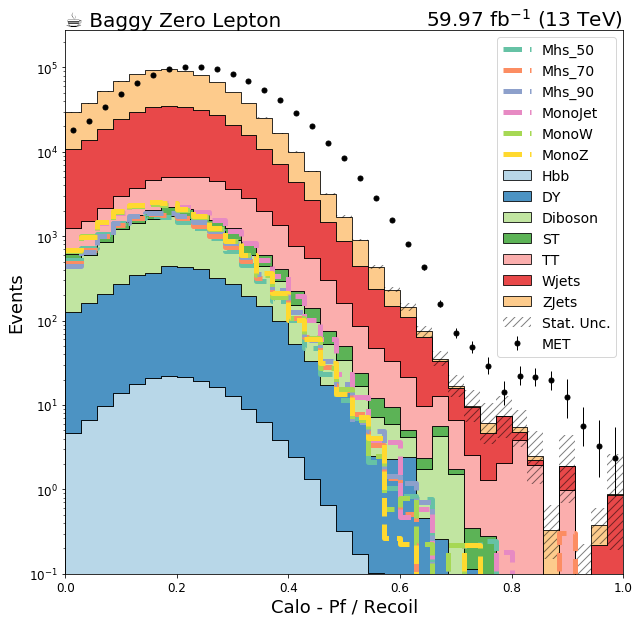

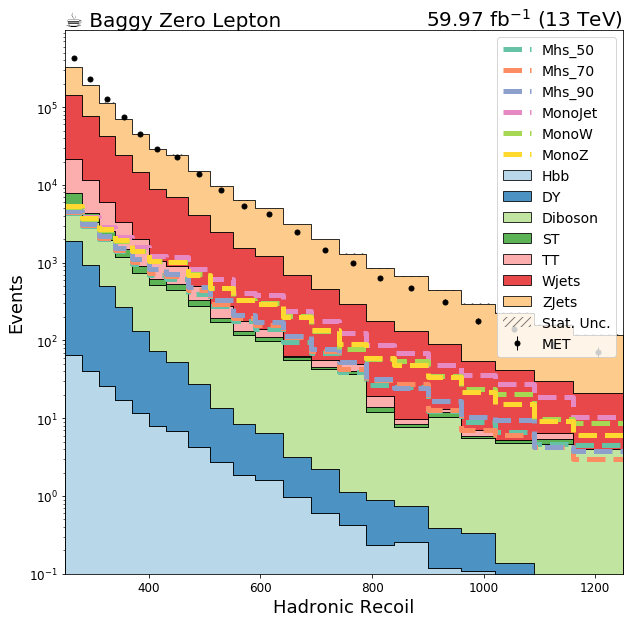

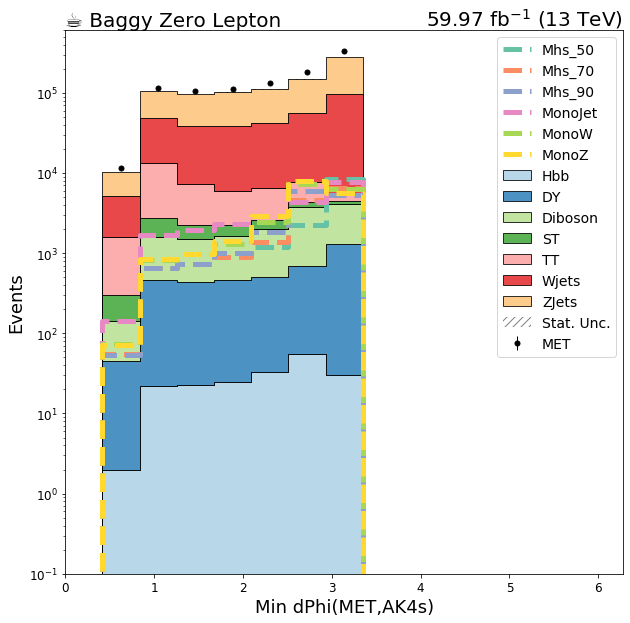

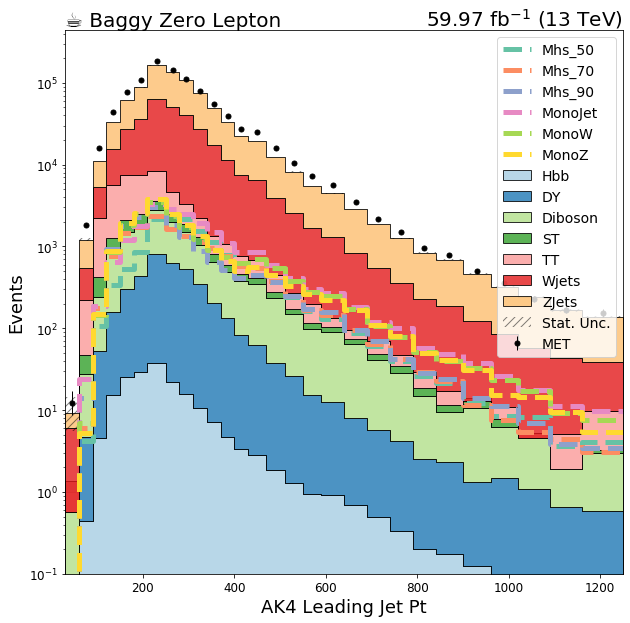

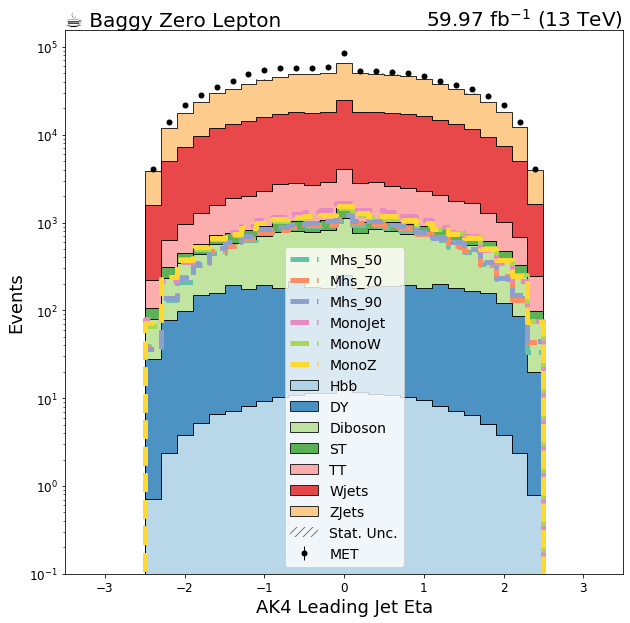

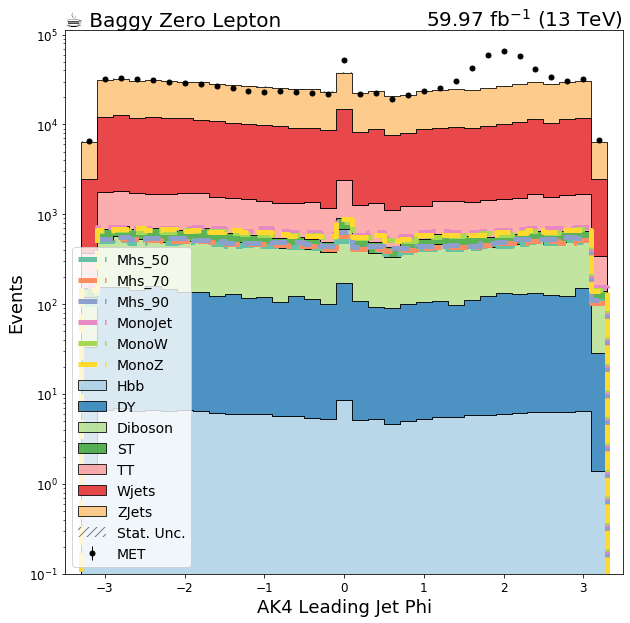

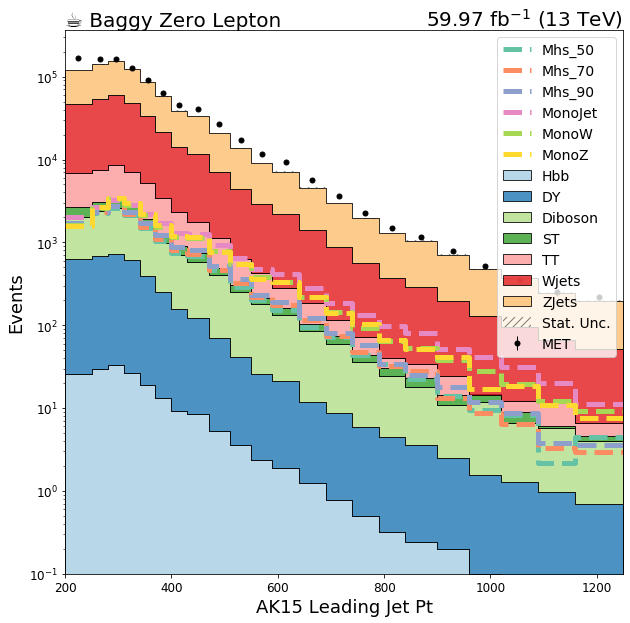

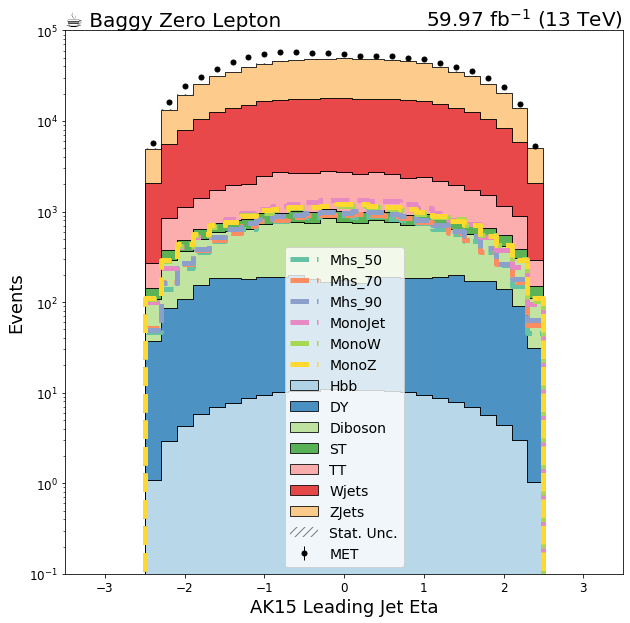

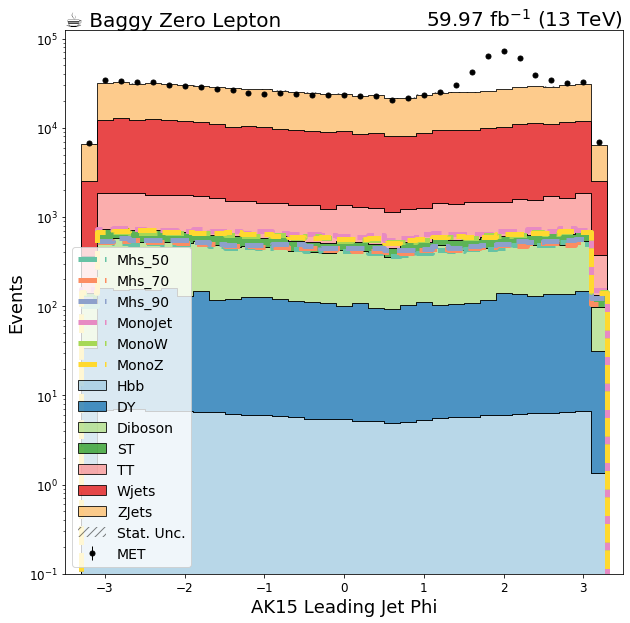

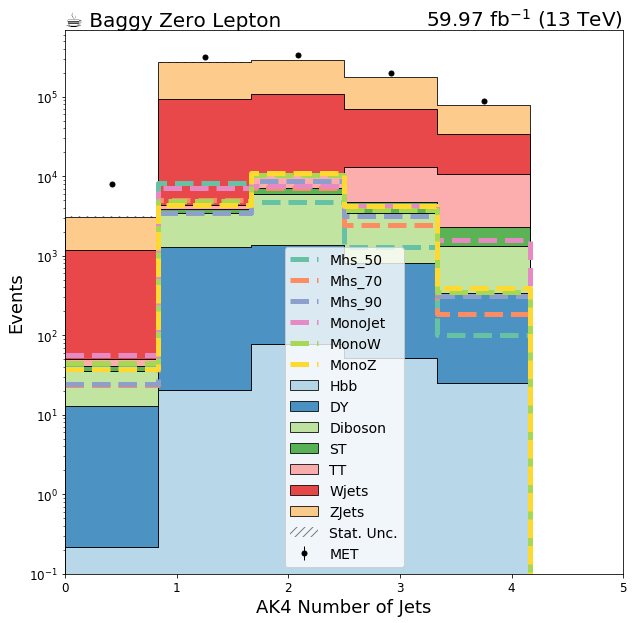

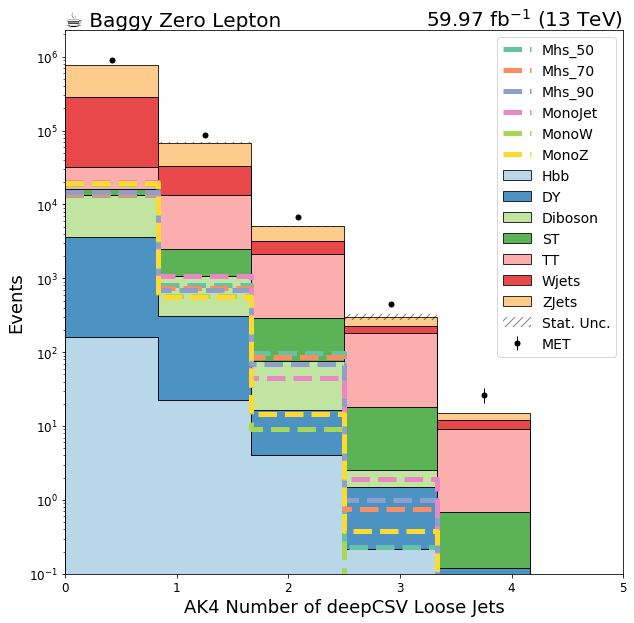

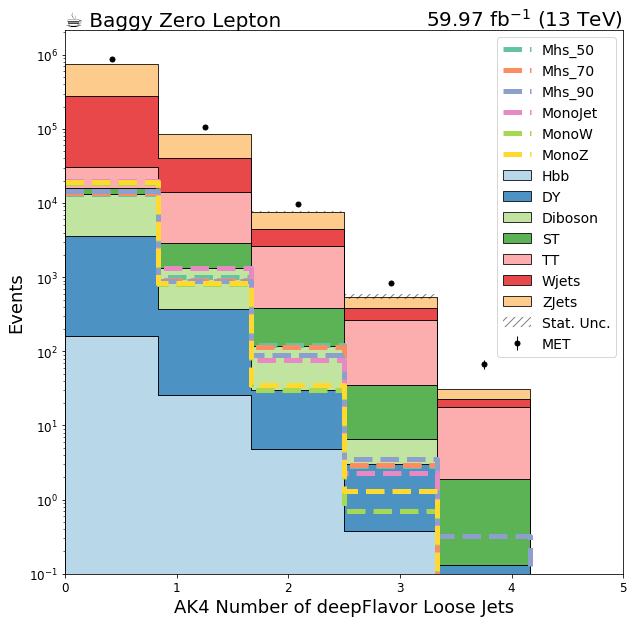

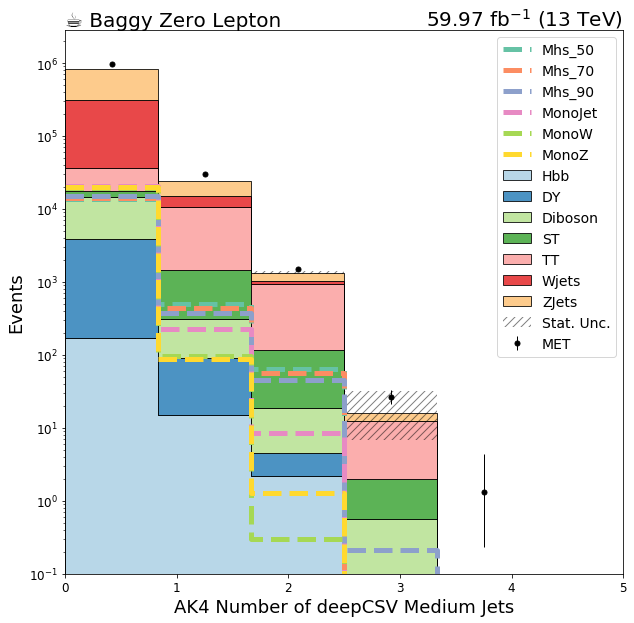

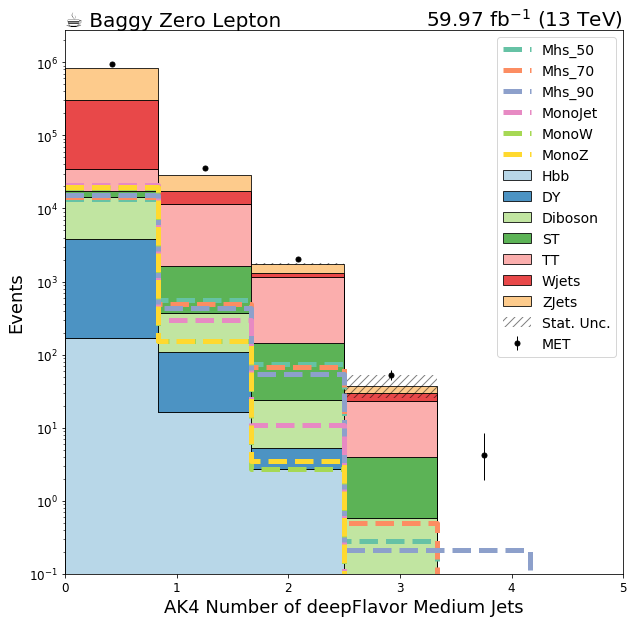

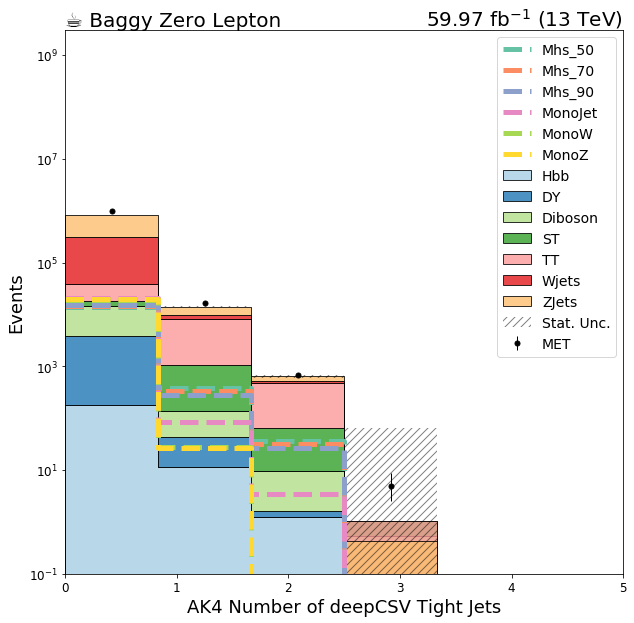

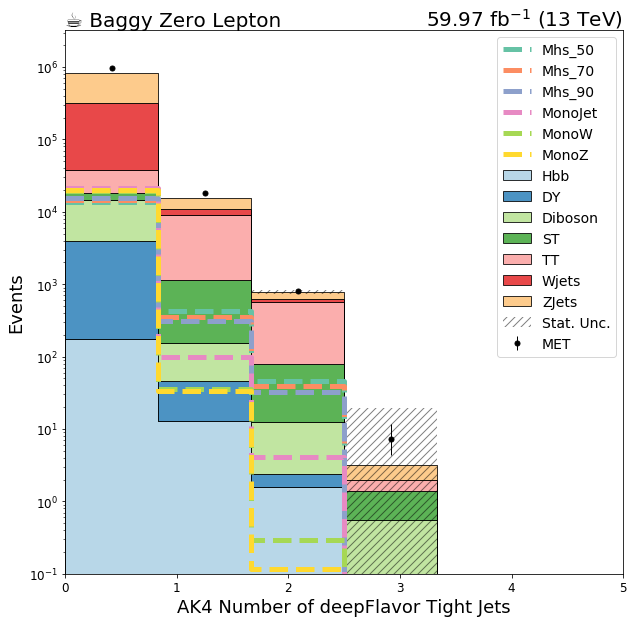

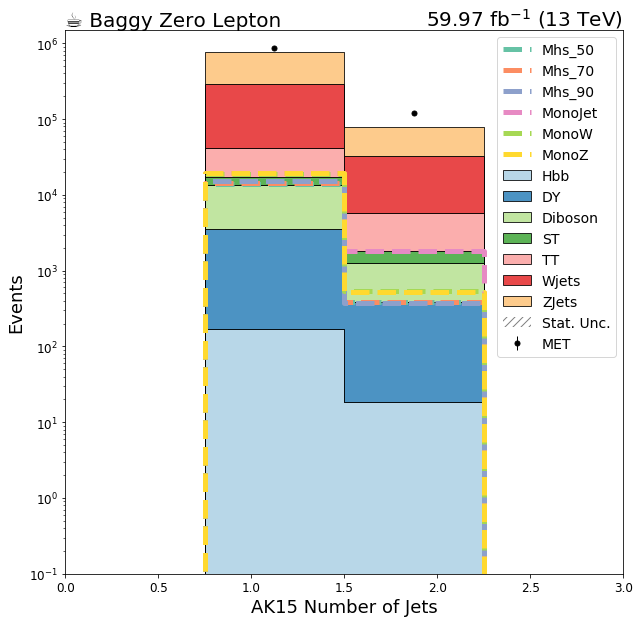

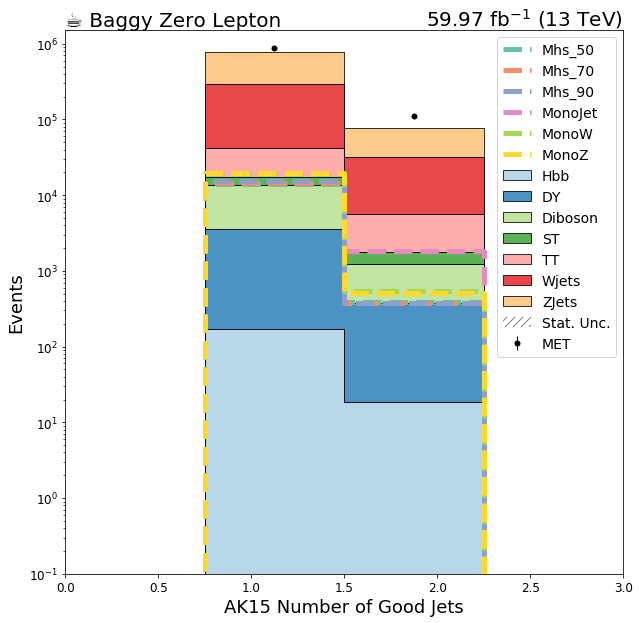

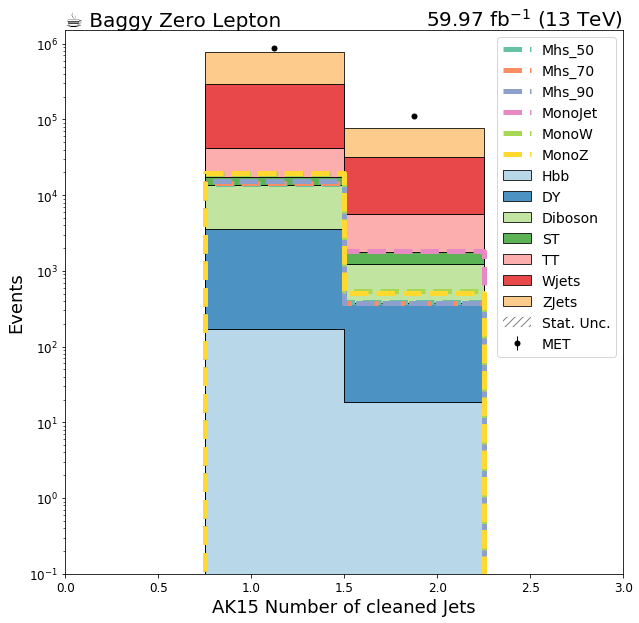

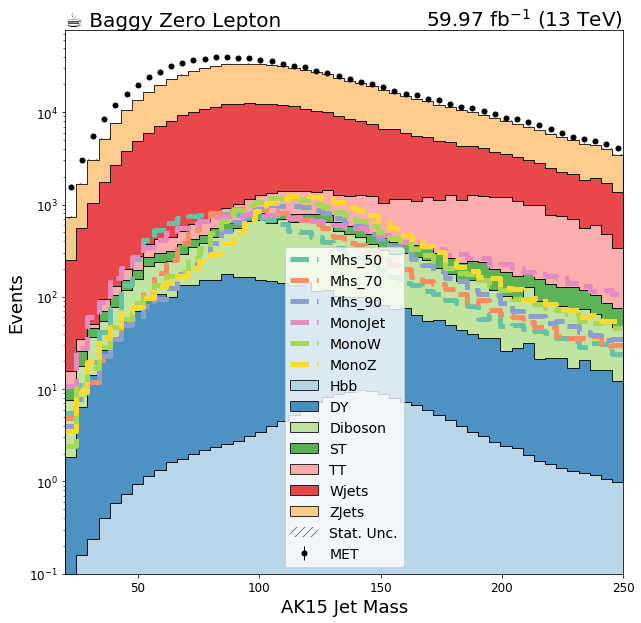

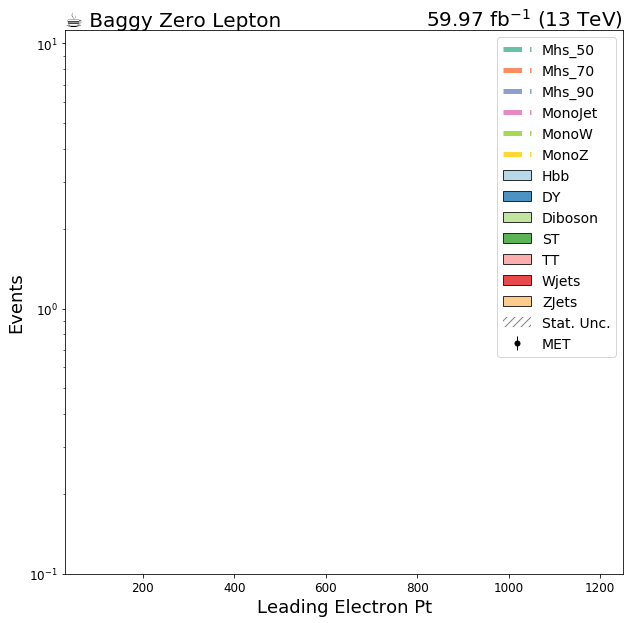

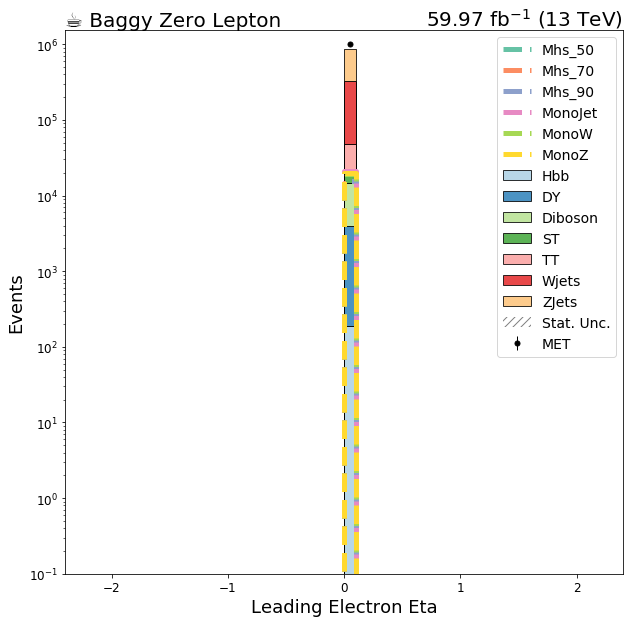

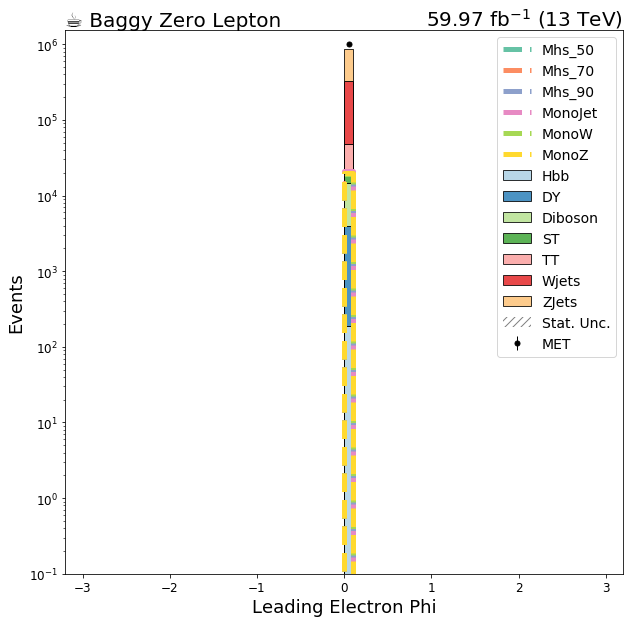

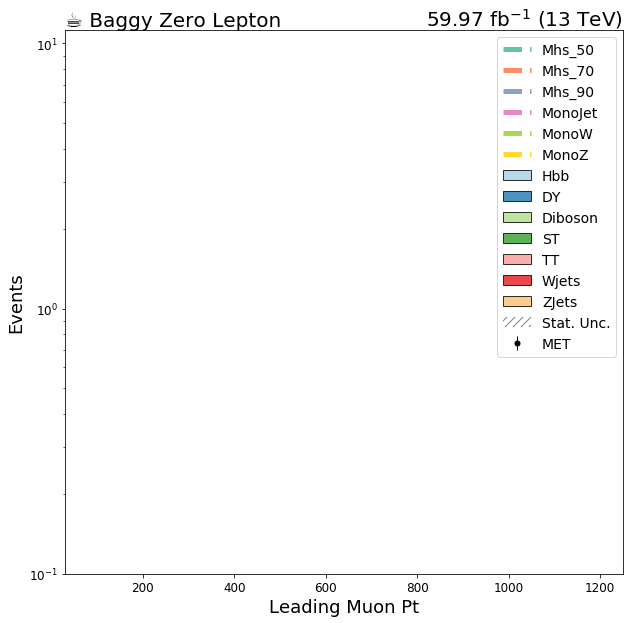

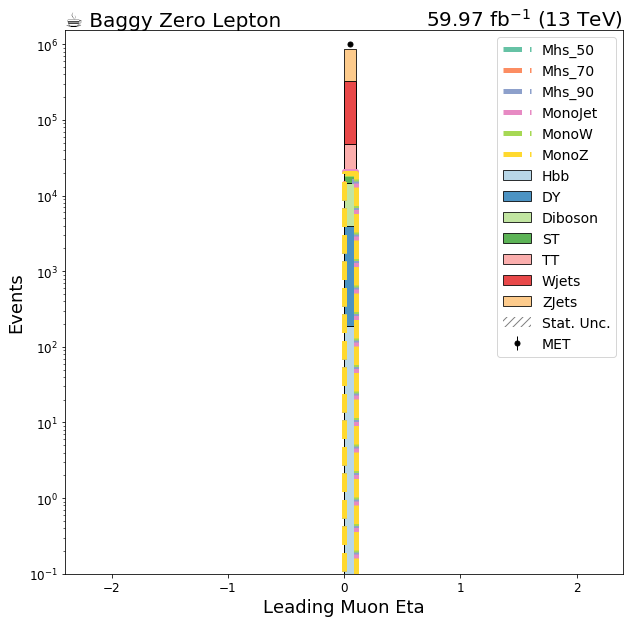

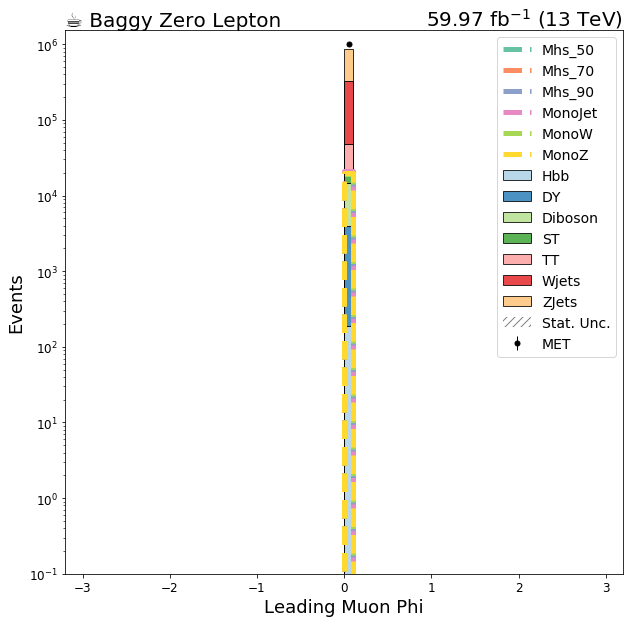

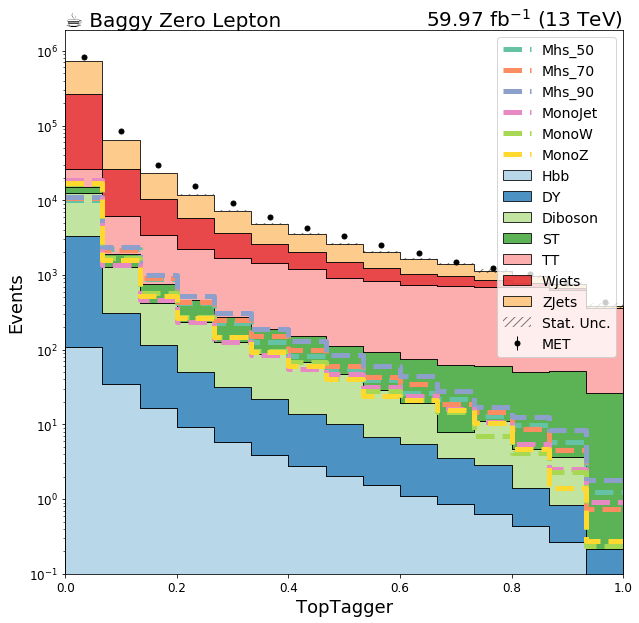

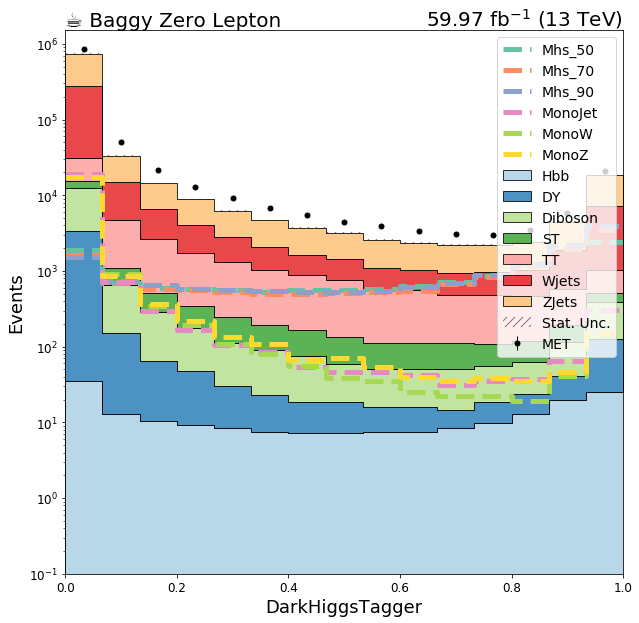

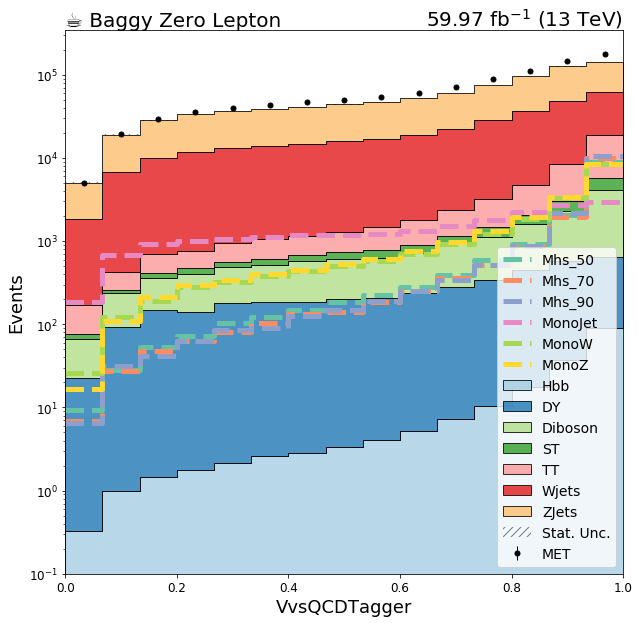

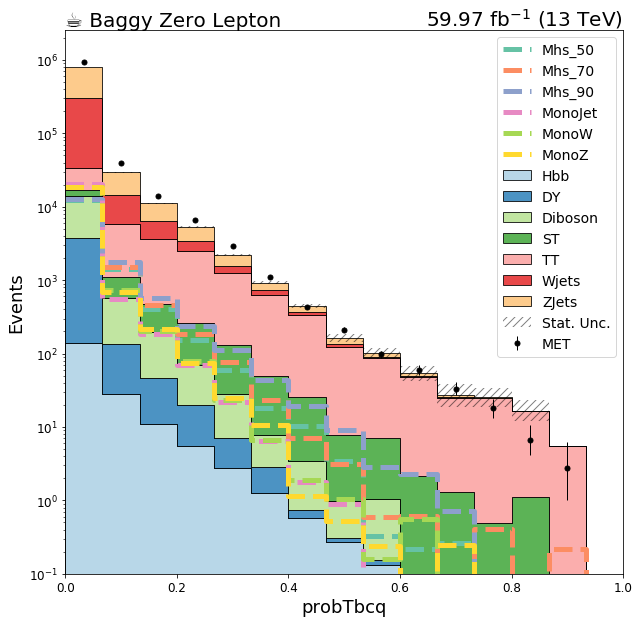

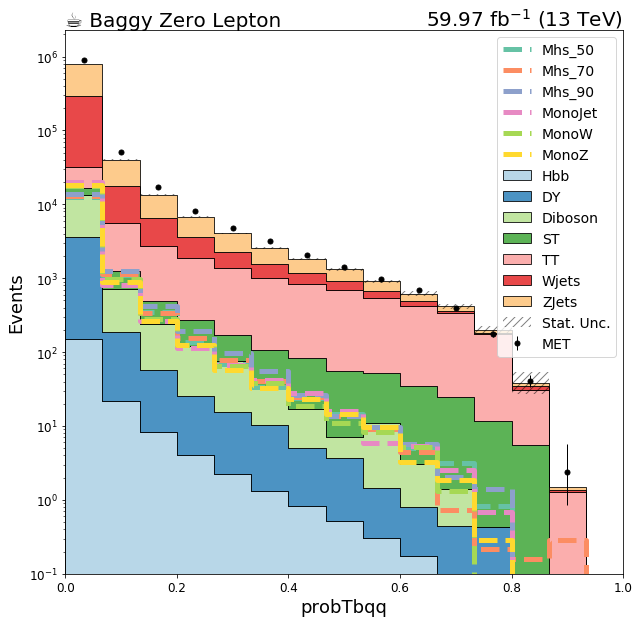

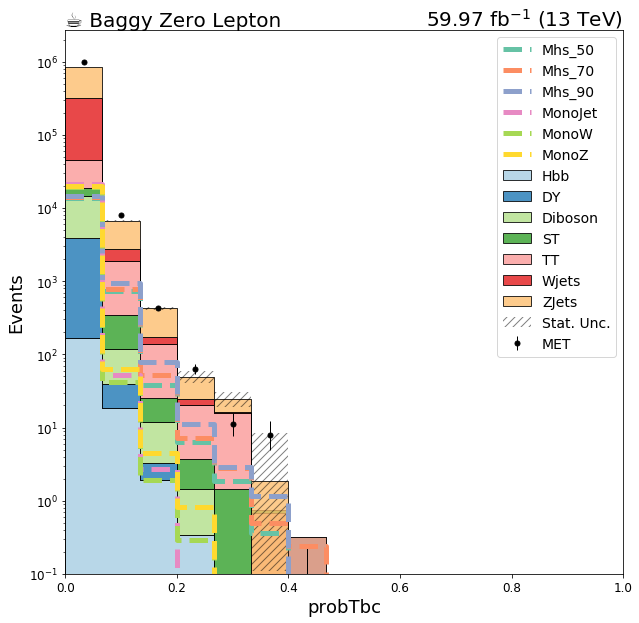

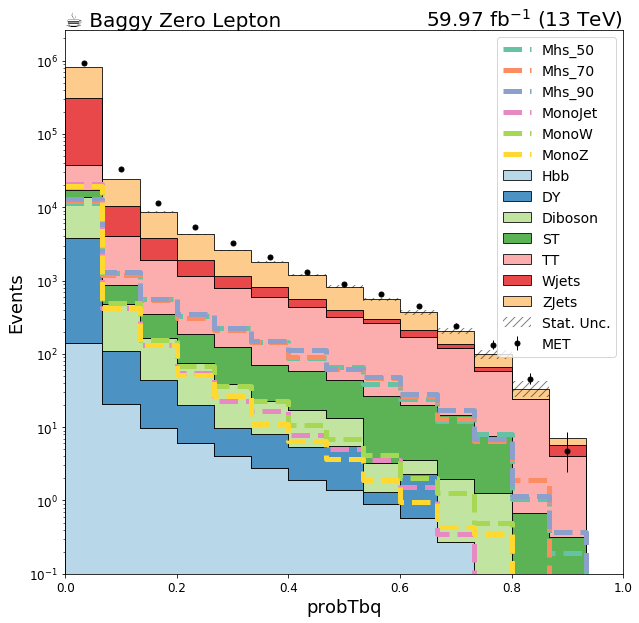

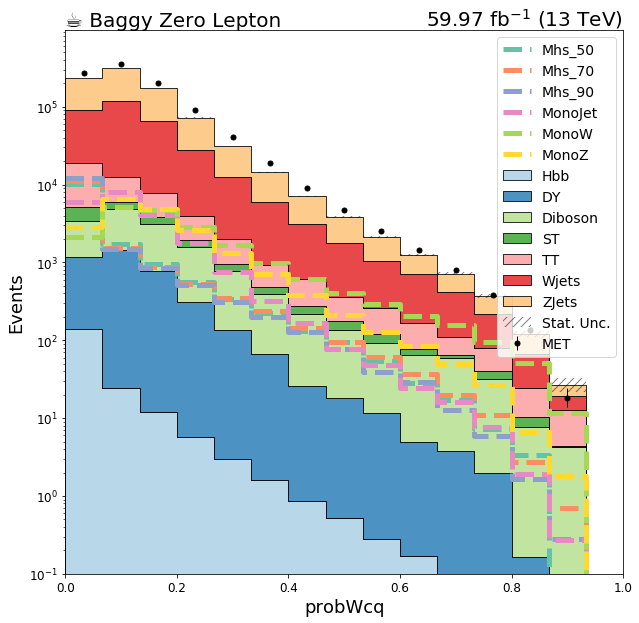

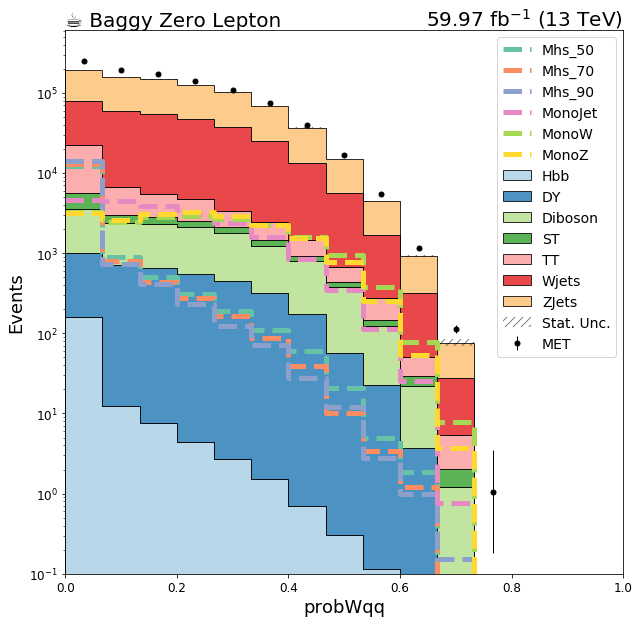

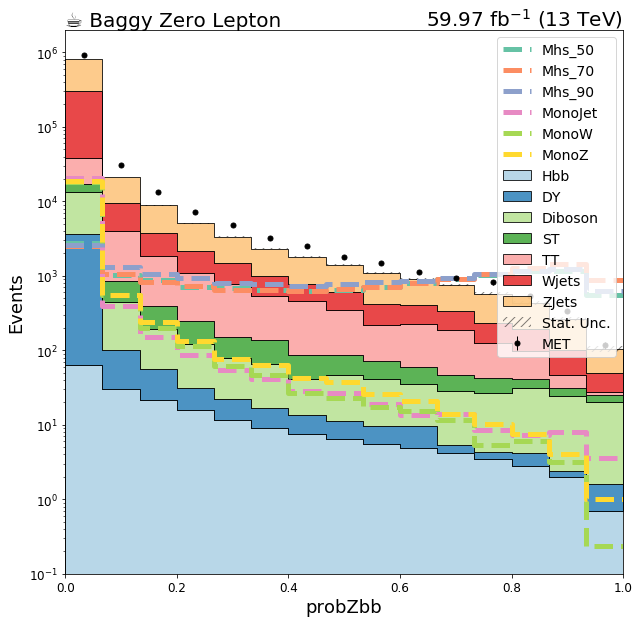

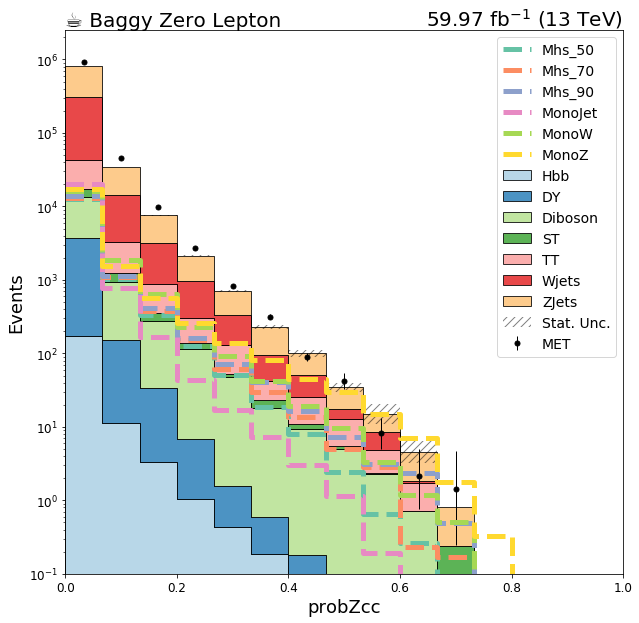

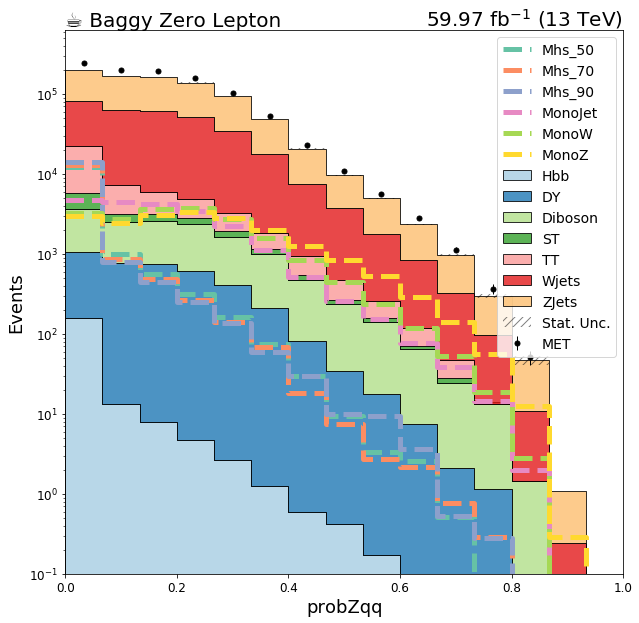

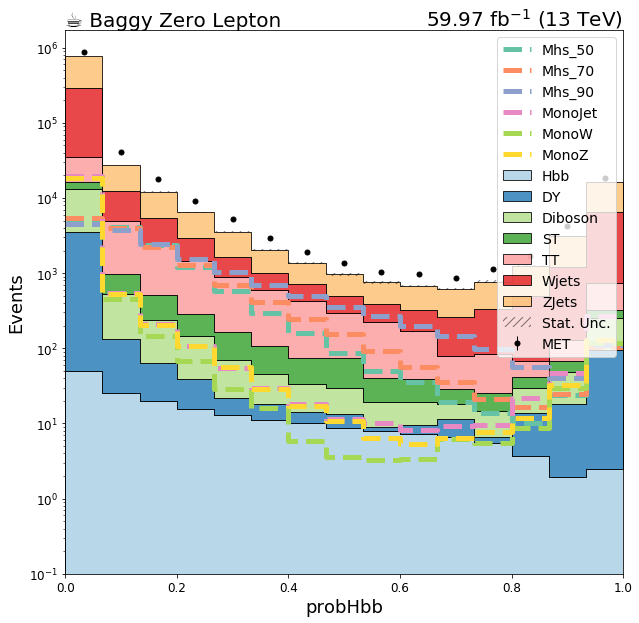

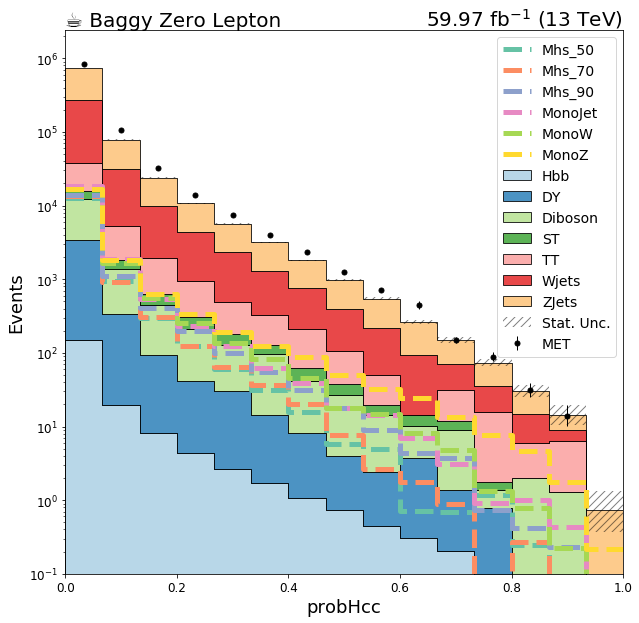

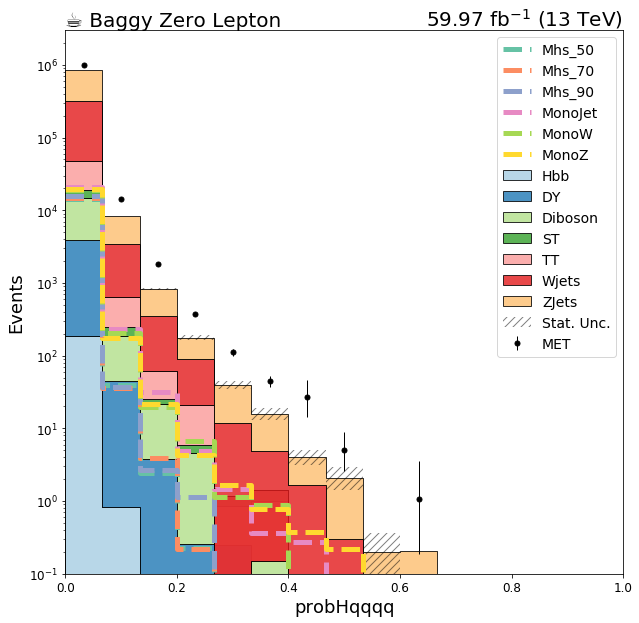

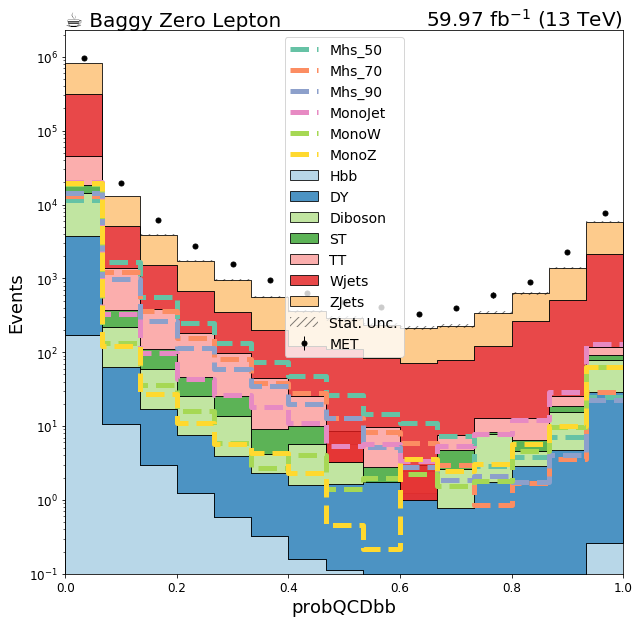

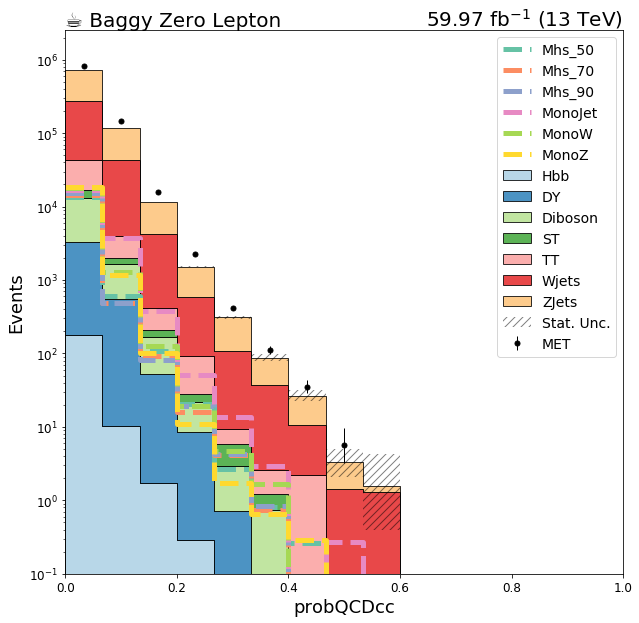

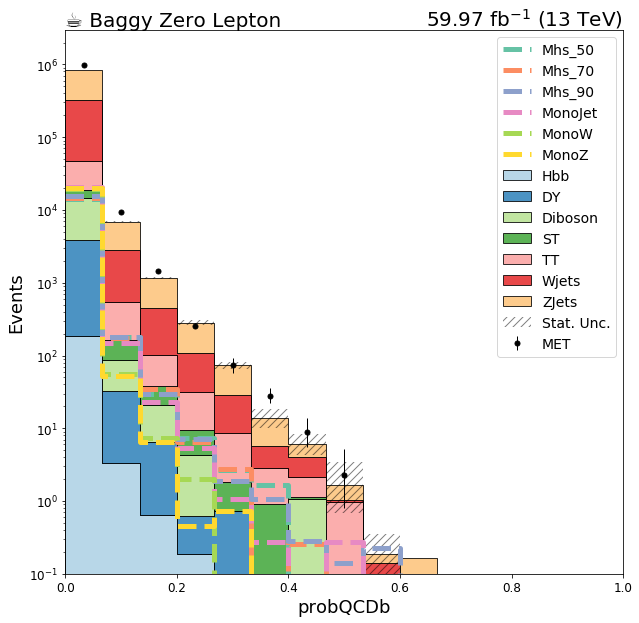

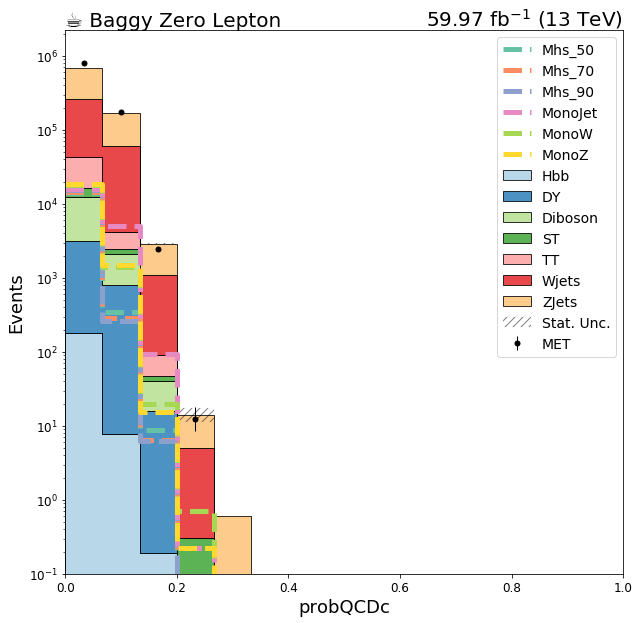

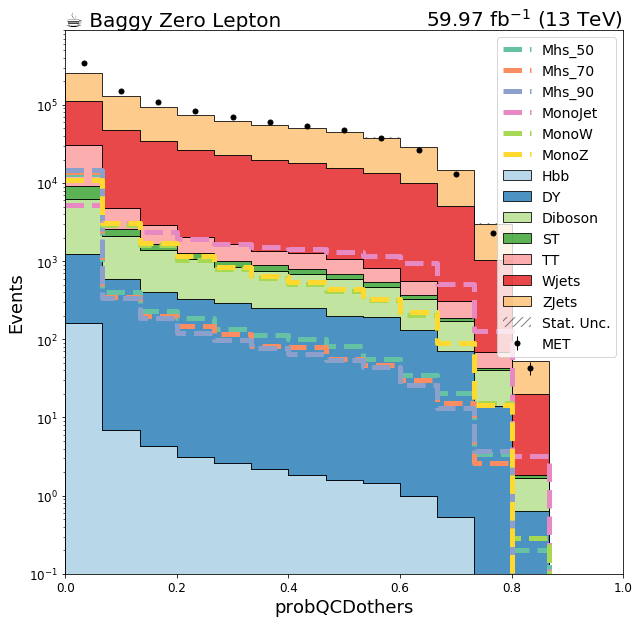

In [13]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
#colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in hists.keys():
    if key=='sumw': continue
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(data_hists[key].project('jet_selection','baggy').project('region','iszeroL'),            
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
               )
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','iszeroL'),
            overlay="process",
            ax=ax,
            clear=False,
            stack=True,
            #line_opts={'linestyle':'none', 'label':'_', 'alpha': 0.},
            #line_opts={'linestyle':'-','color':'k','label':'_'},
            fill_opts=fill_opts,
            error_opts=error_opts
               )
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    plot.plot1d(signal_hists[key].project('jet_selection','baggy').project('region','iszeroL'), 
                ax=ax, overlay="process", clear=False, stack=False, line_opts=args)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Baggy Zero Lepton", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('stack') 
    plot_name = 'stack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

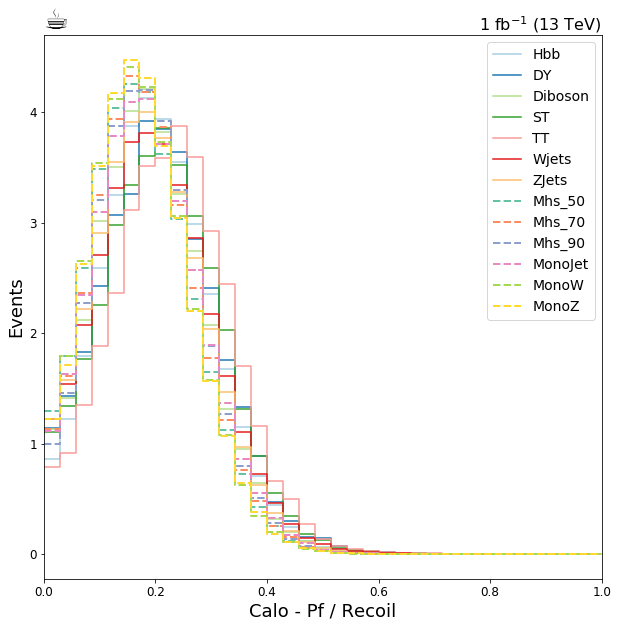

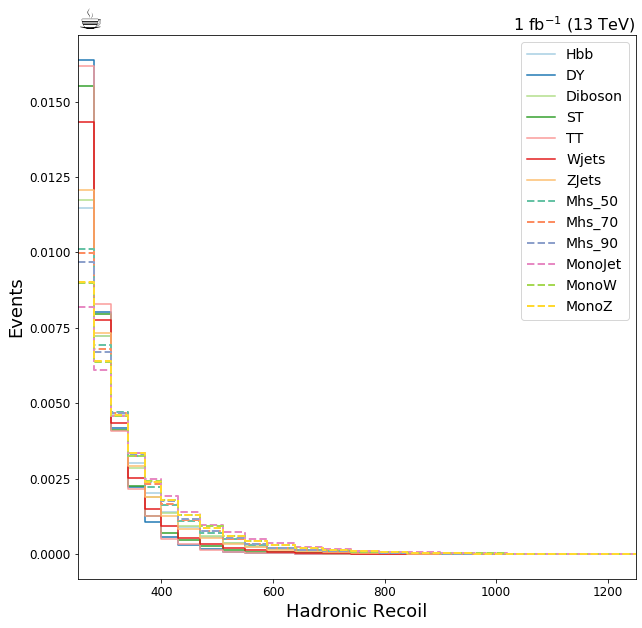

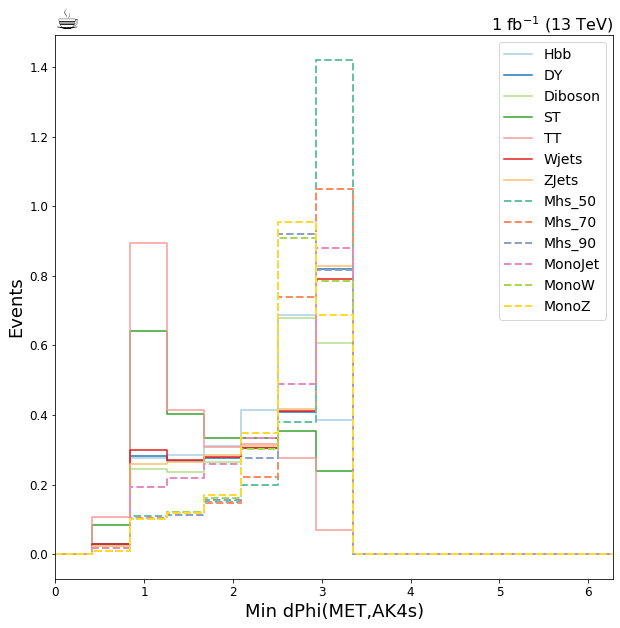

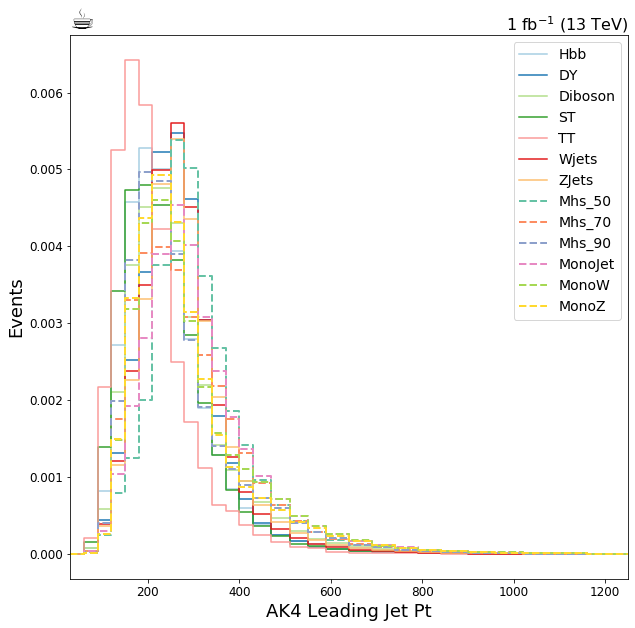

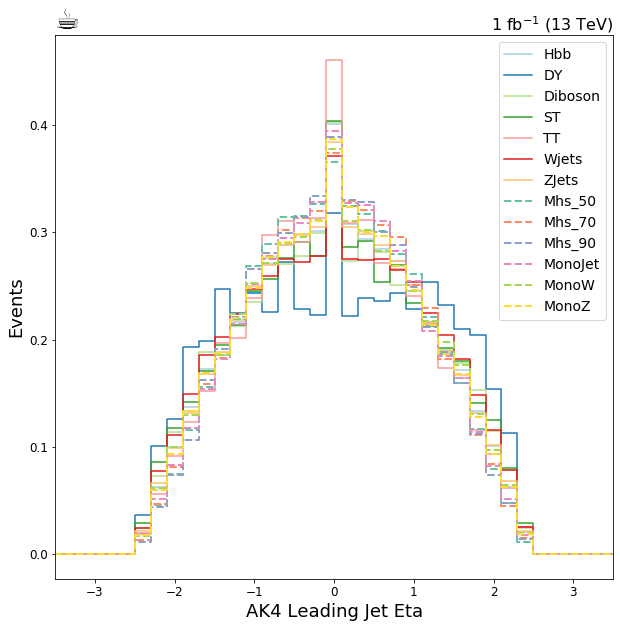

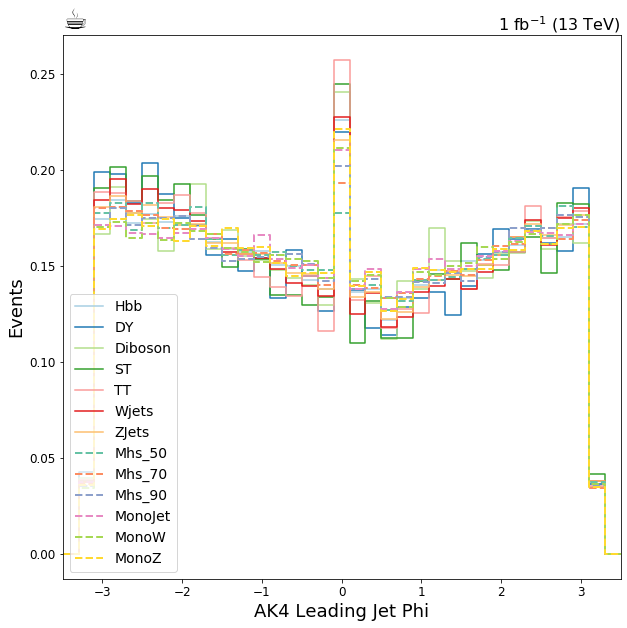

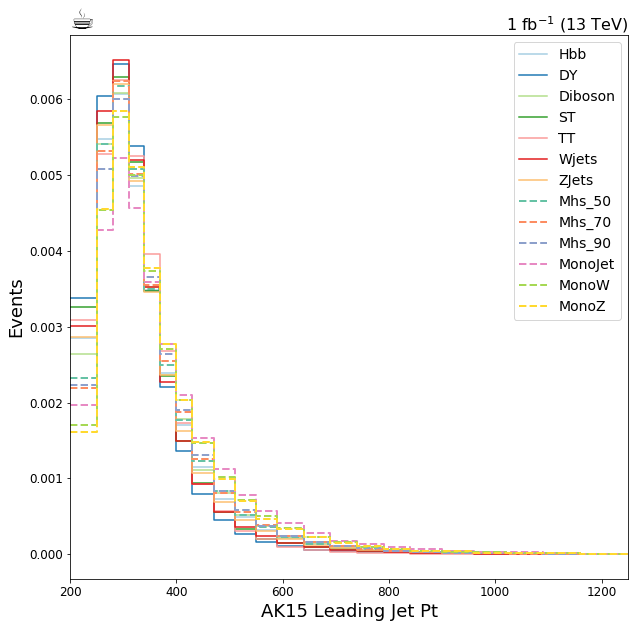

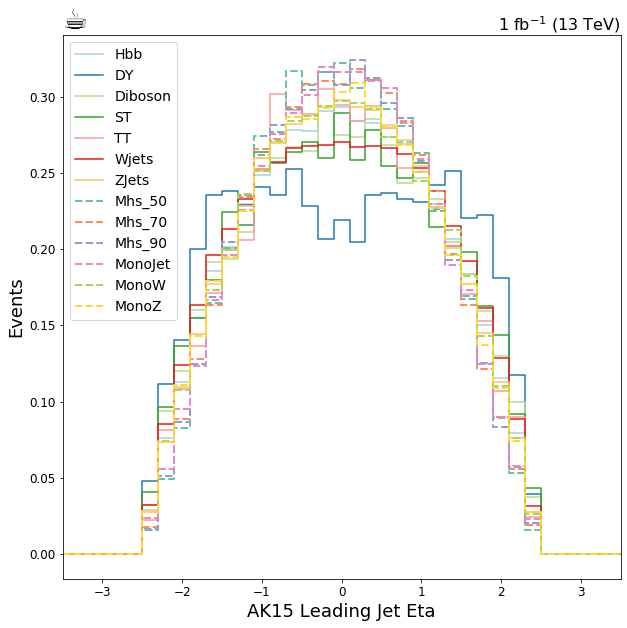

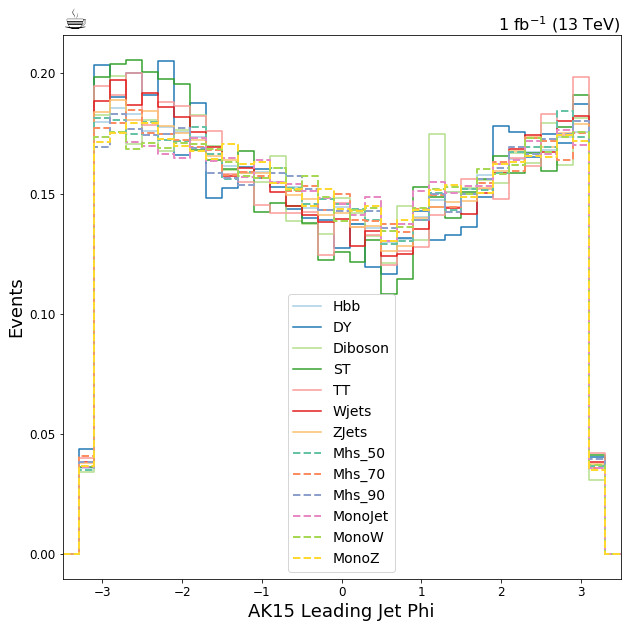

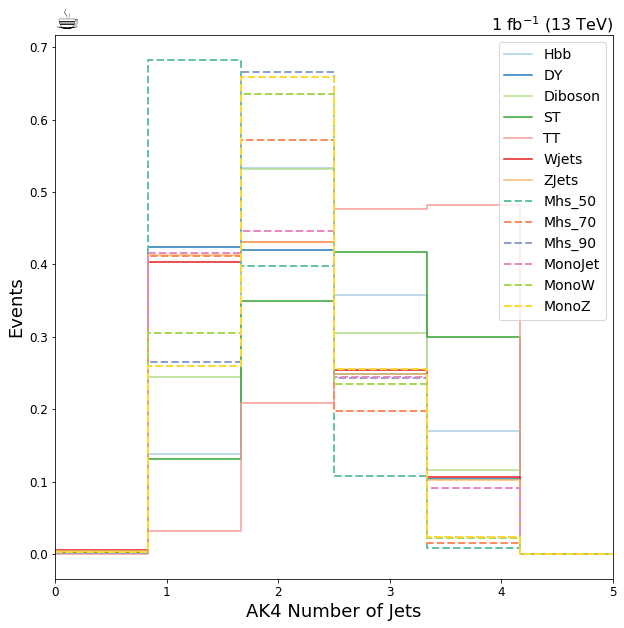

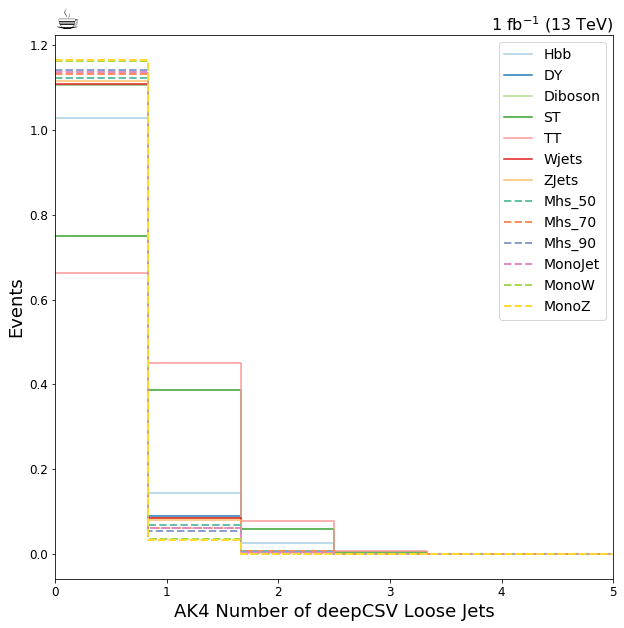

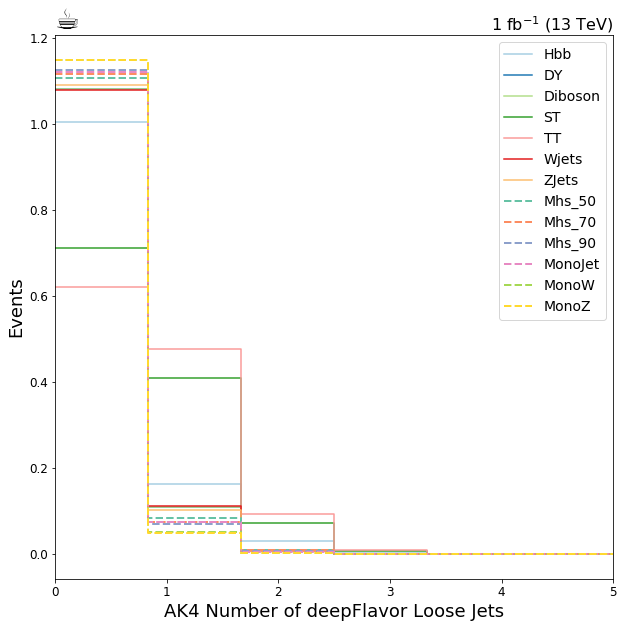

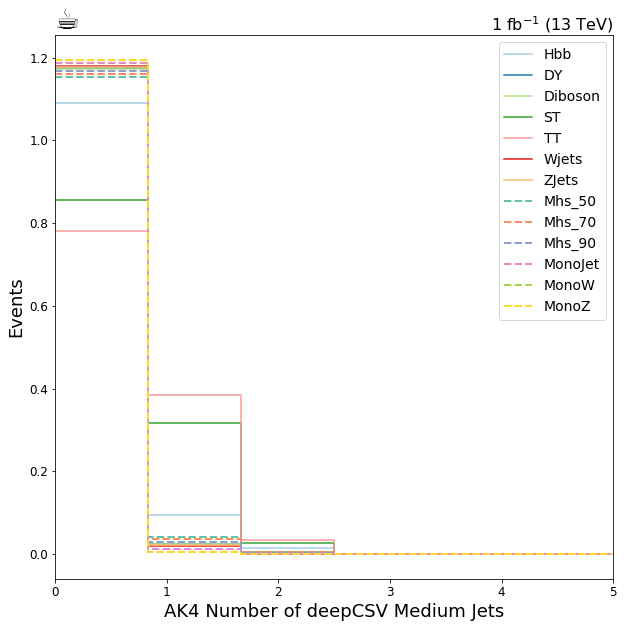

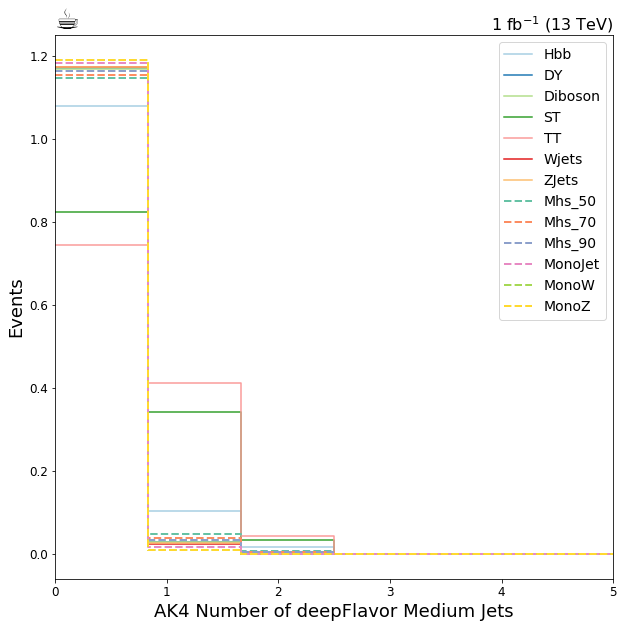

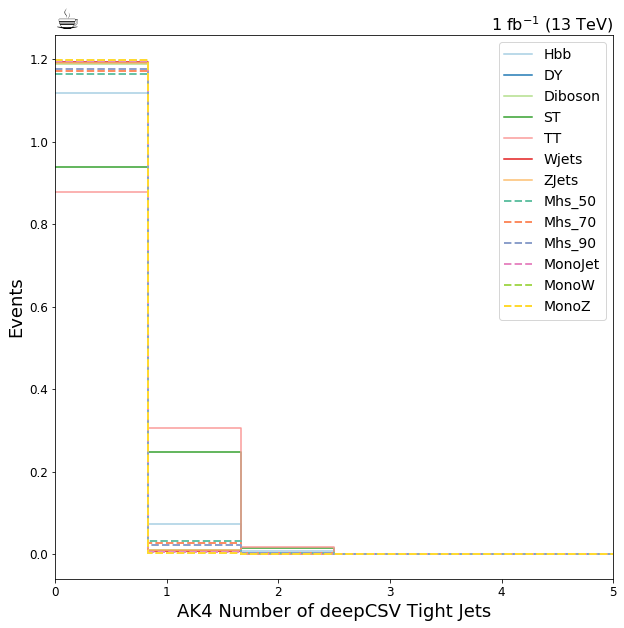

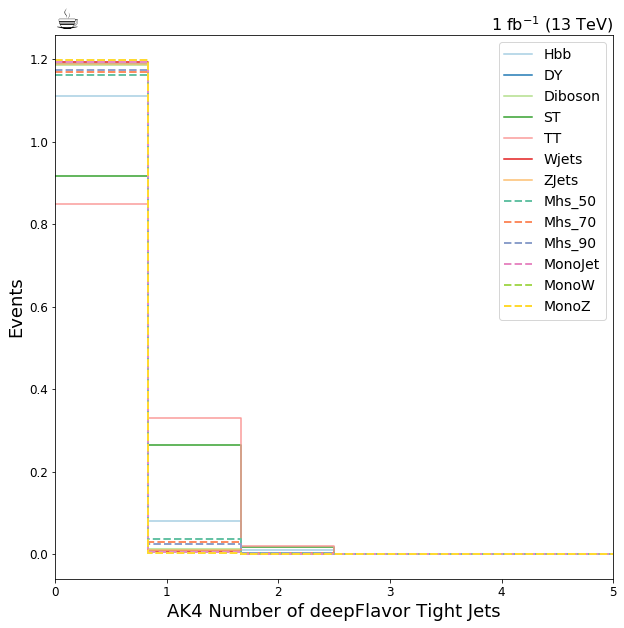

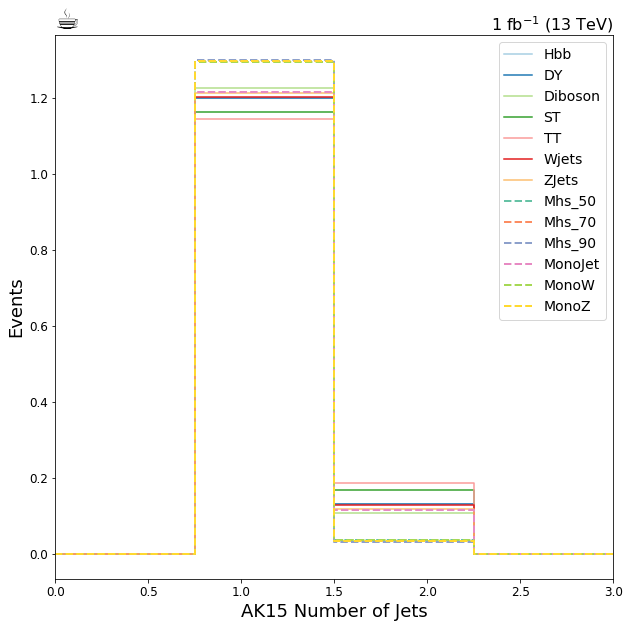

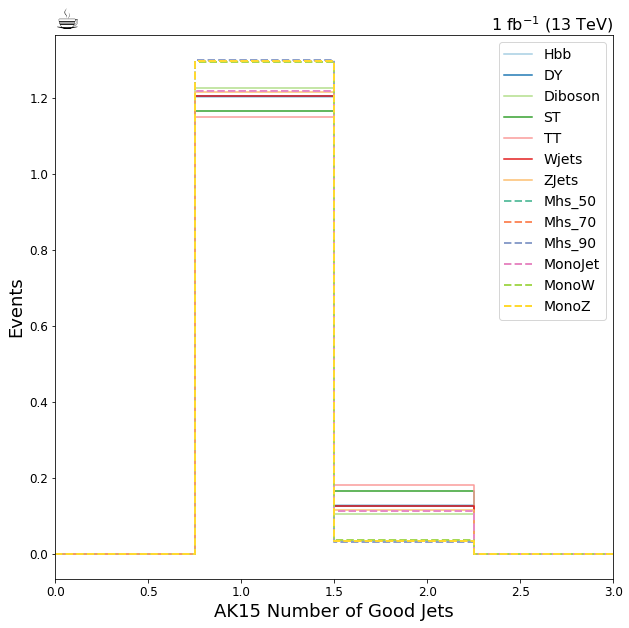

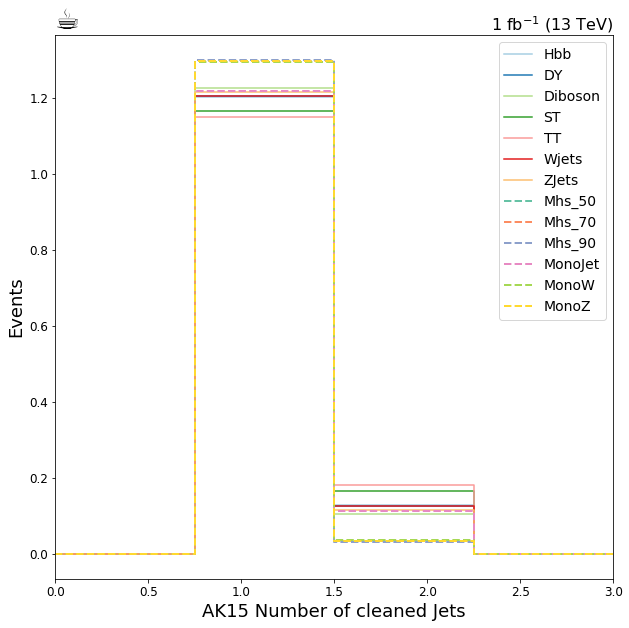

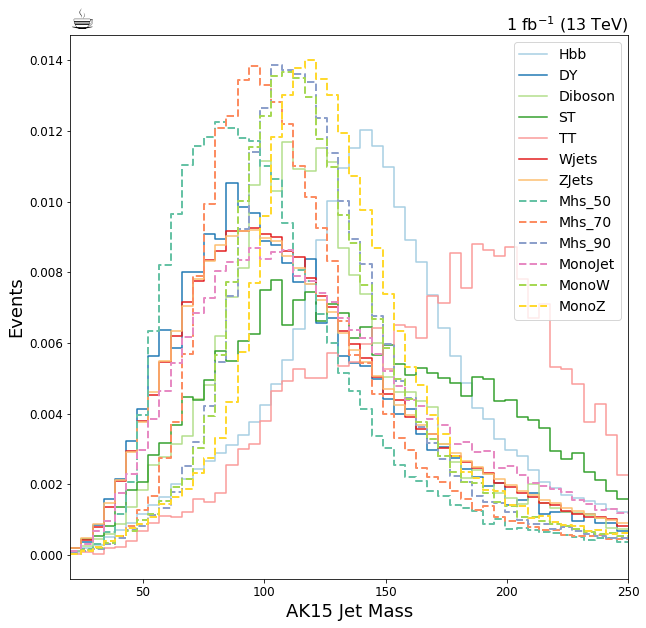

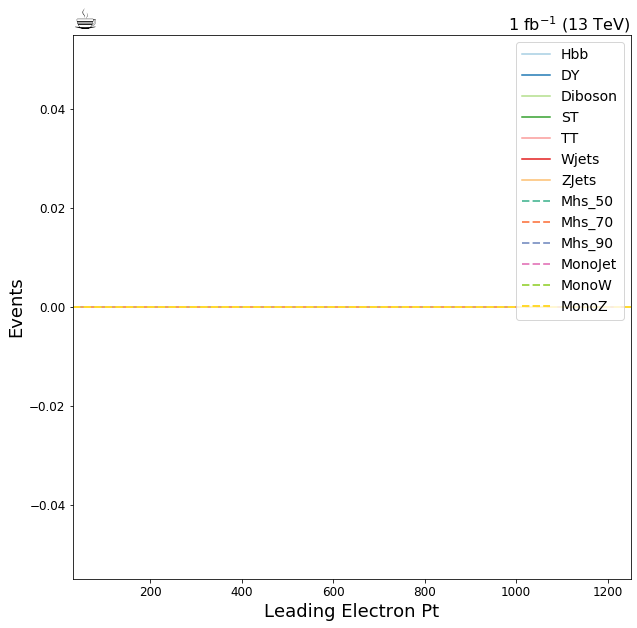

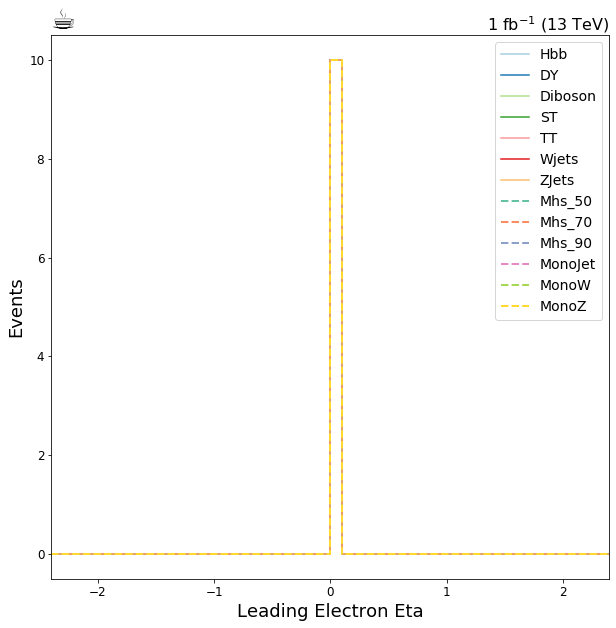

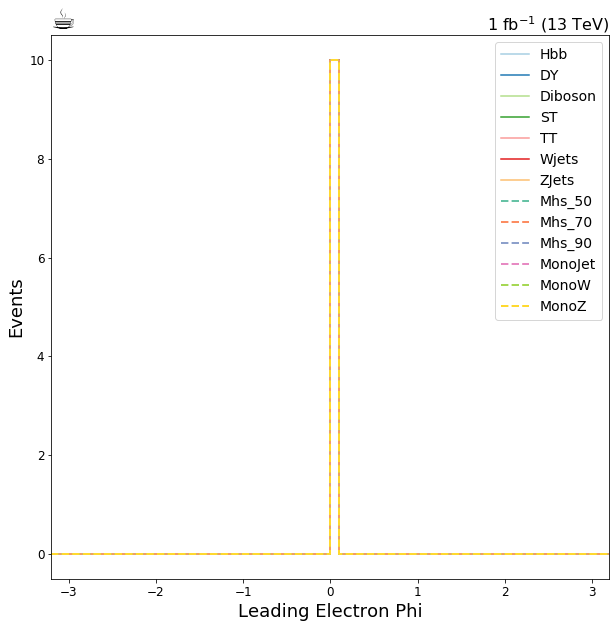

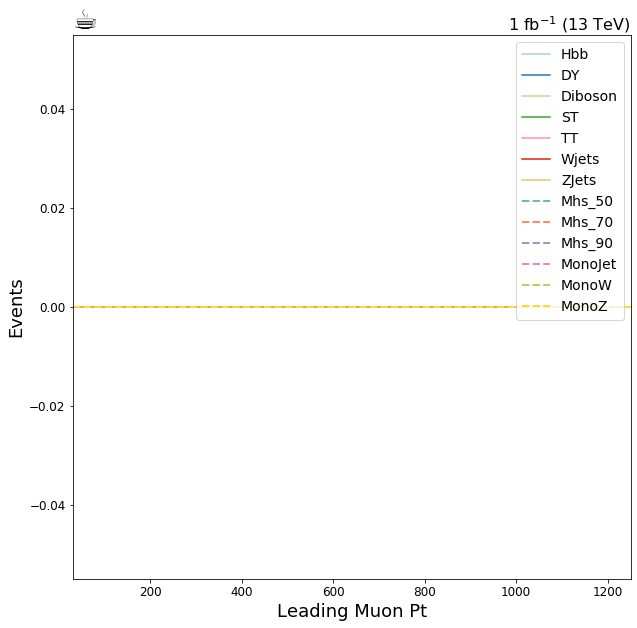

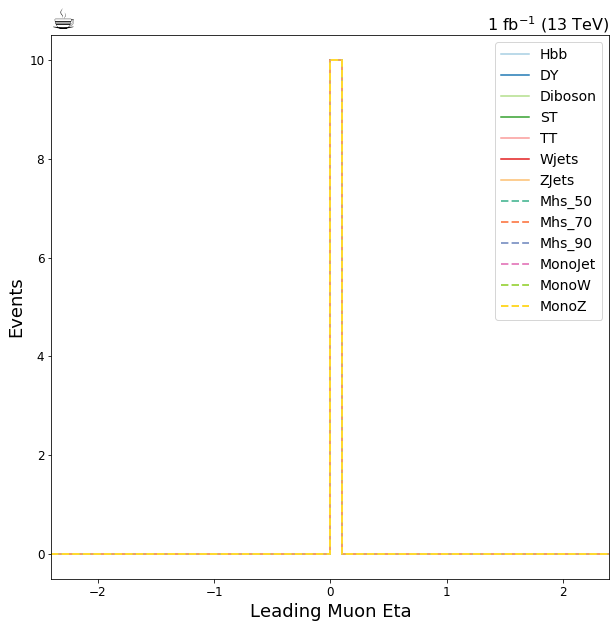

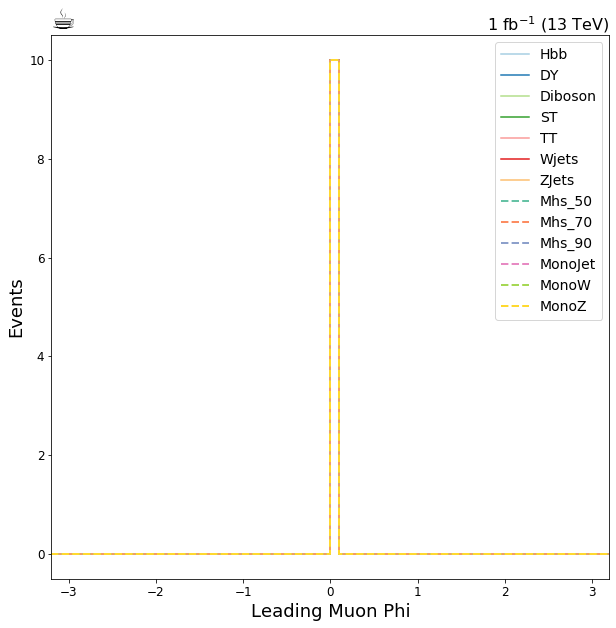

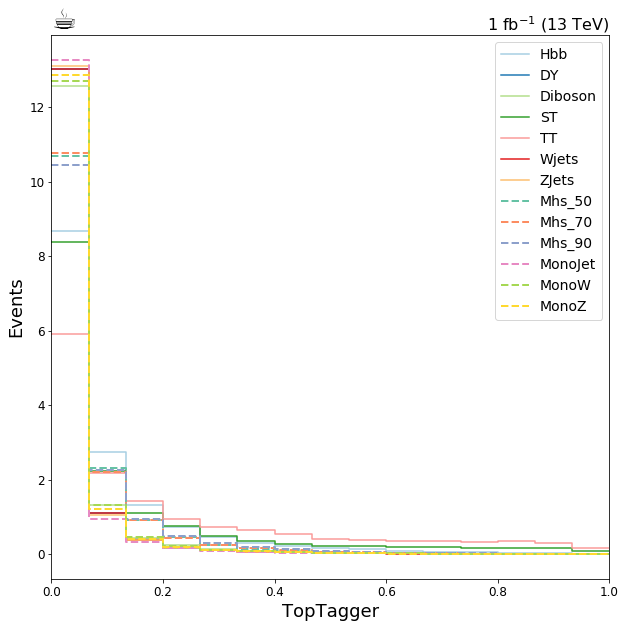

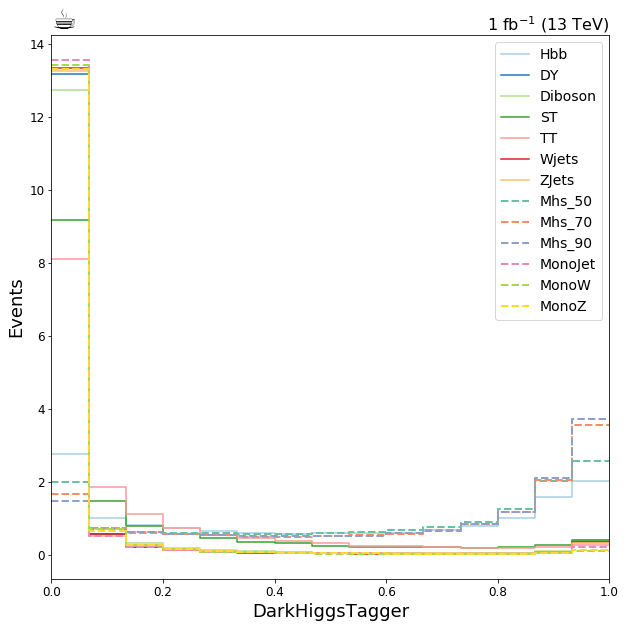

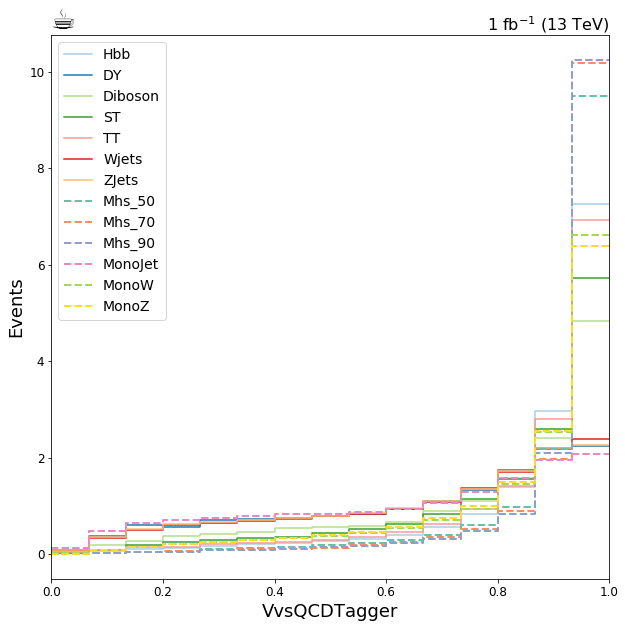

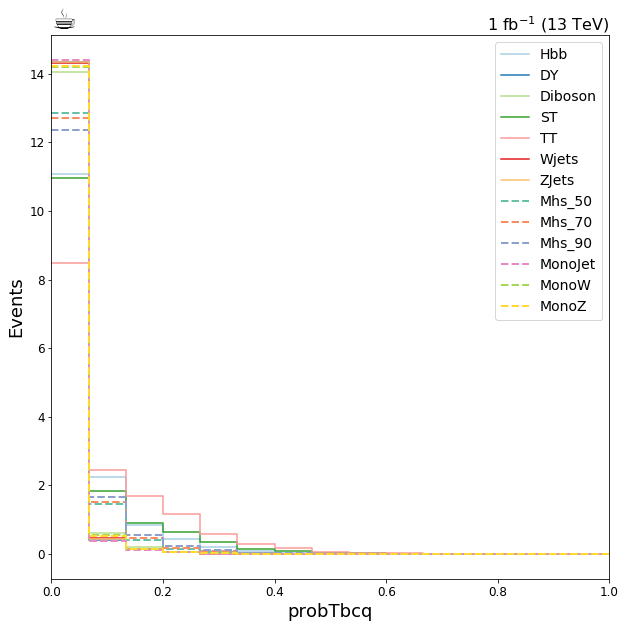

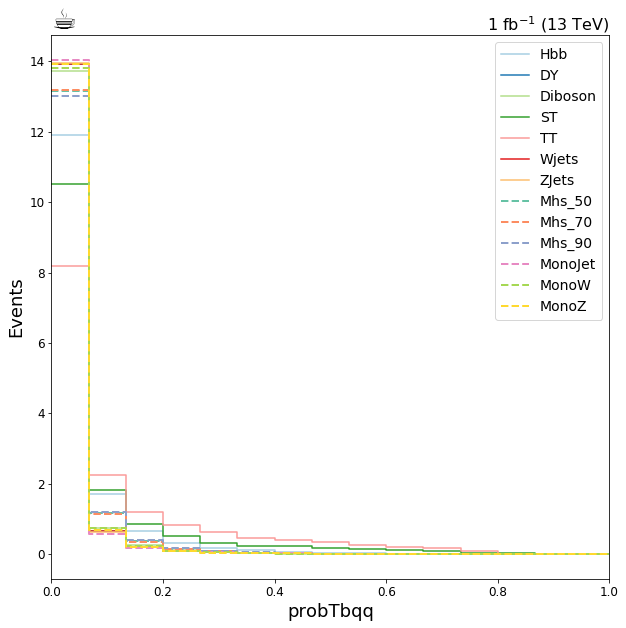

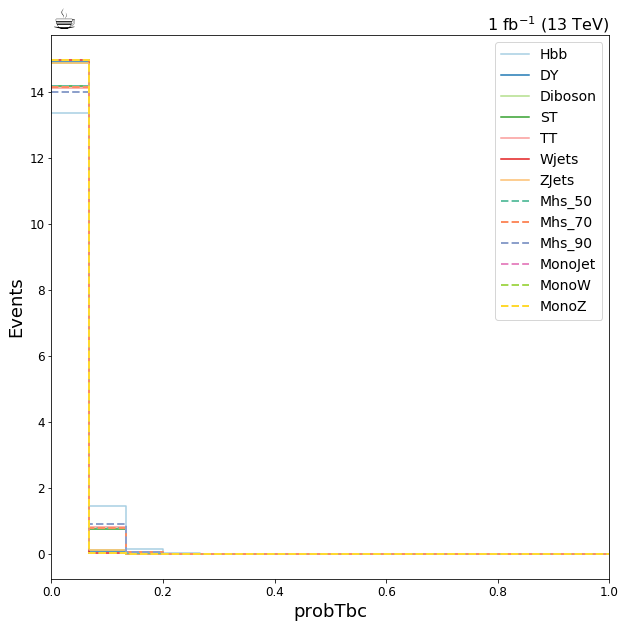

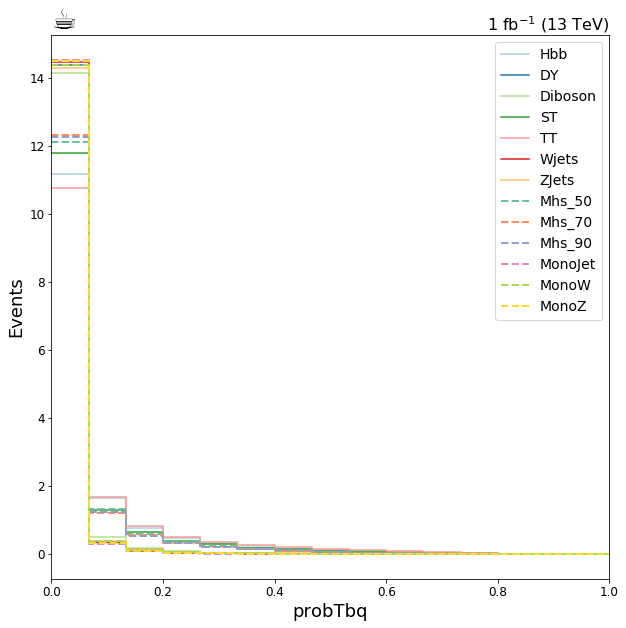

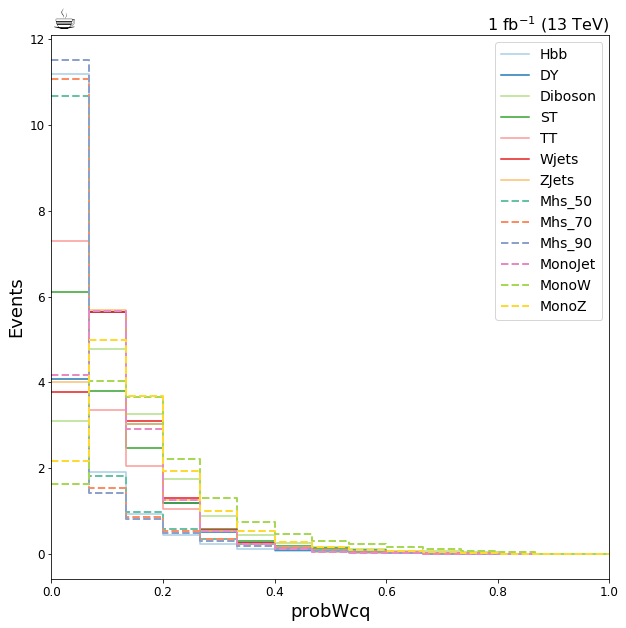

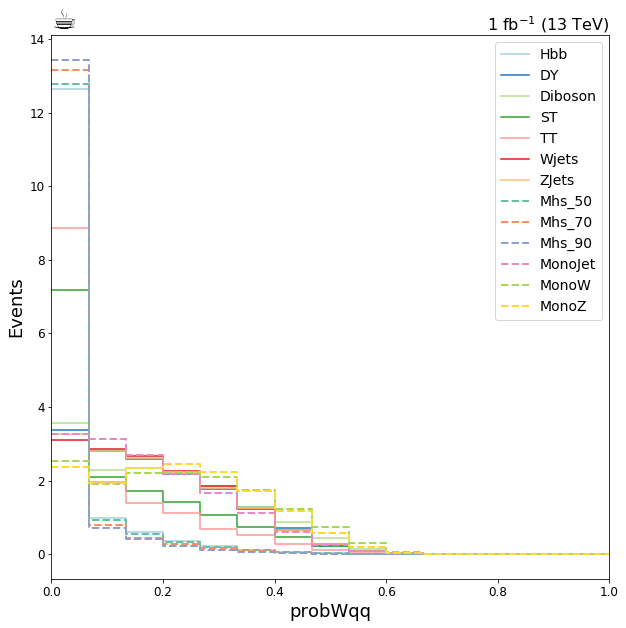

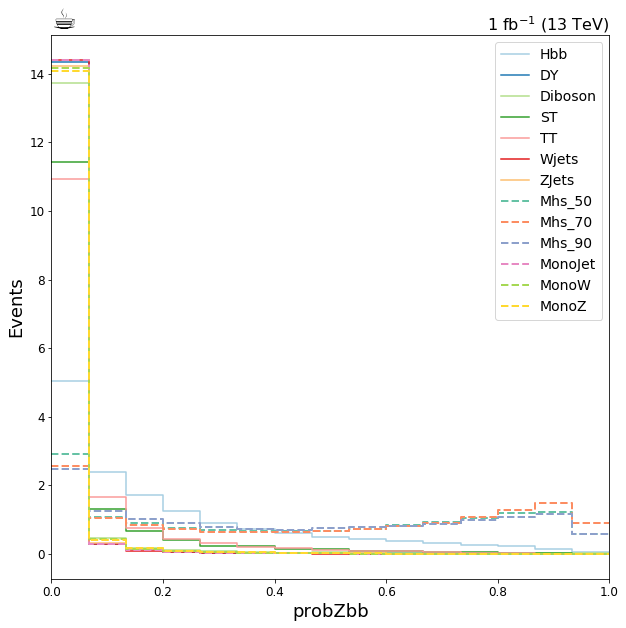

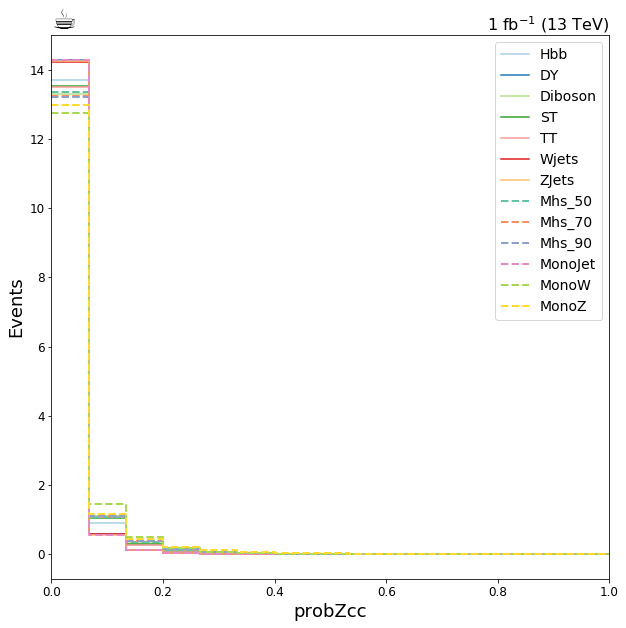

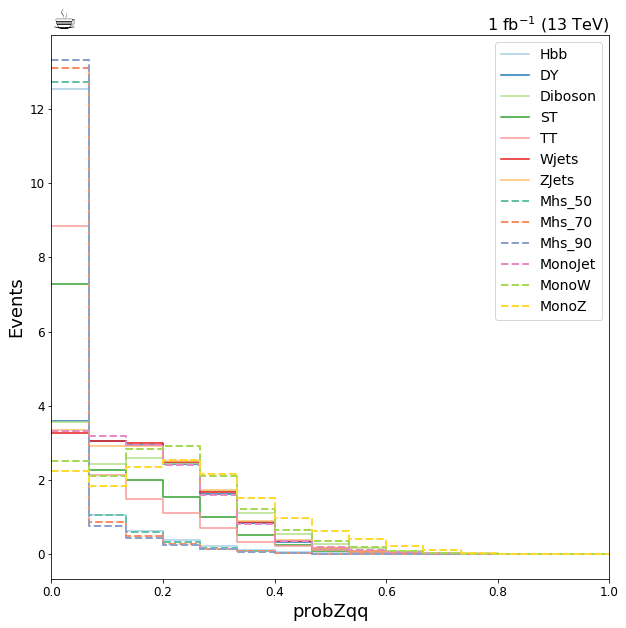

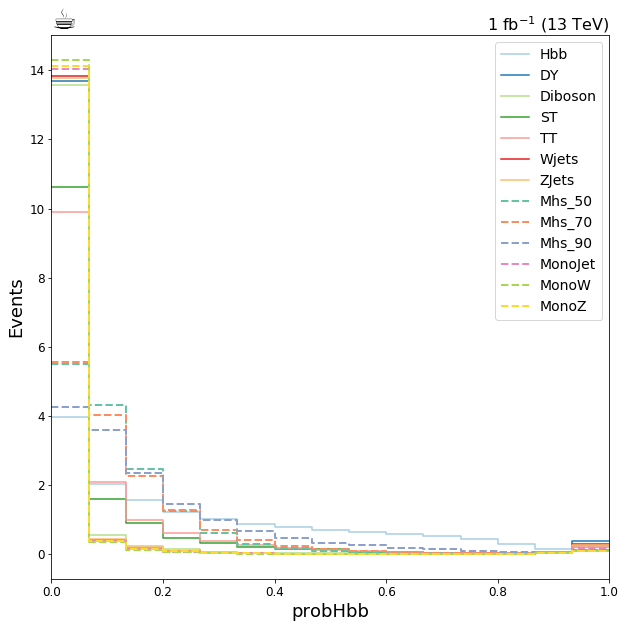

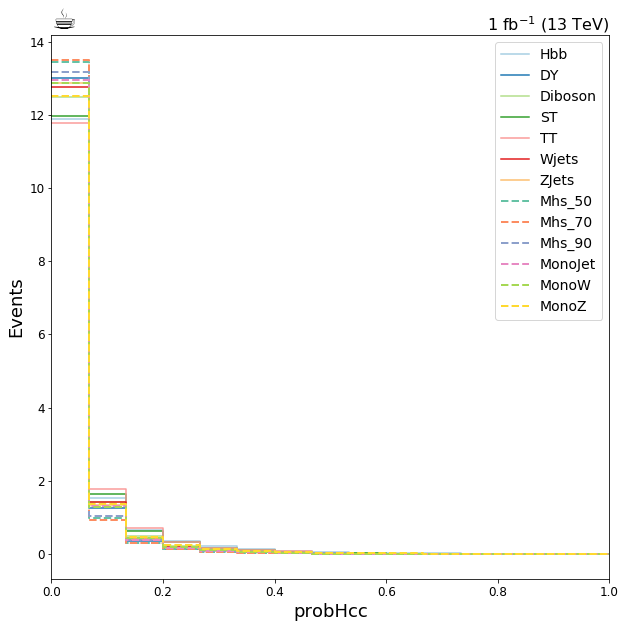

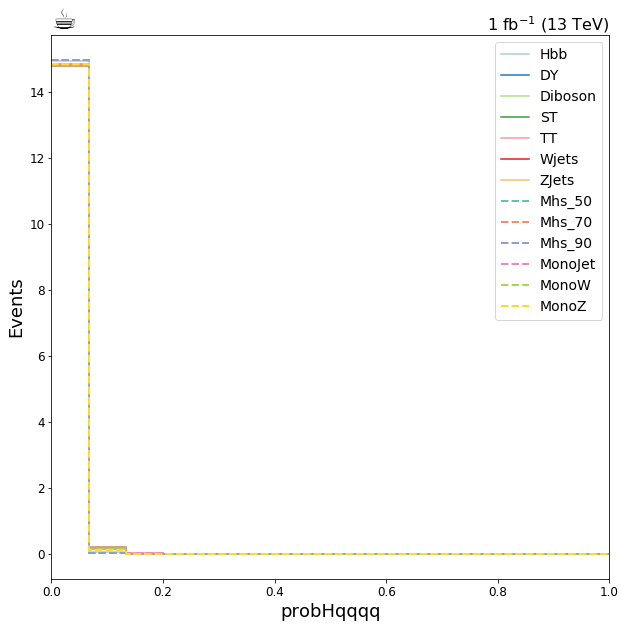

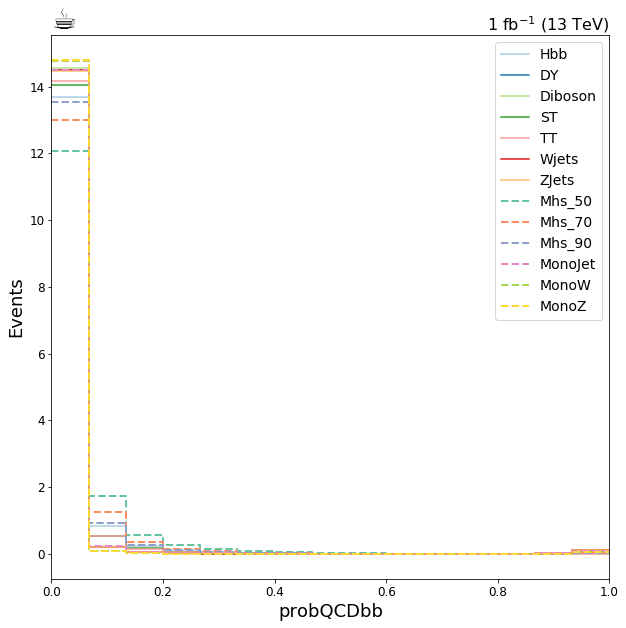

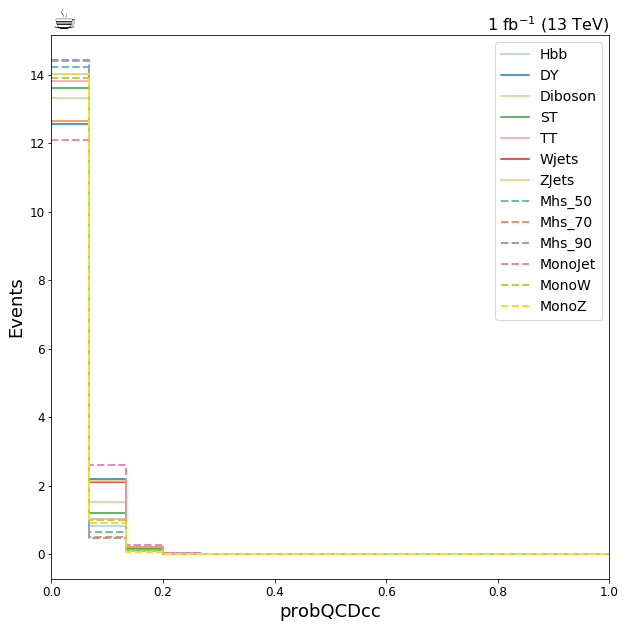

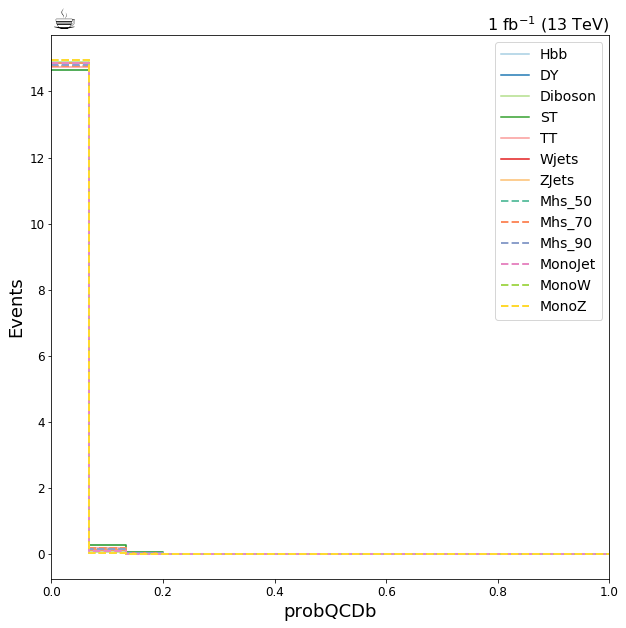

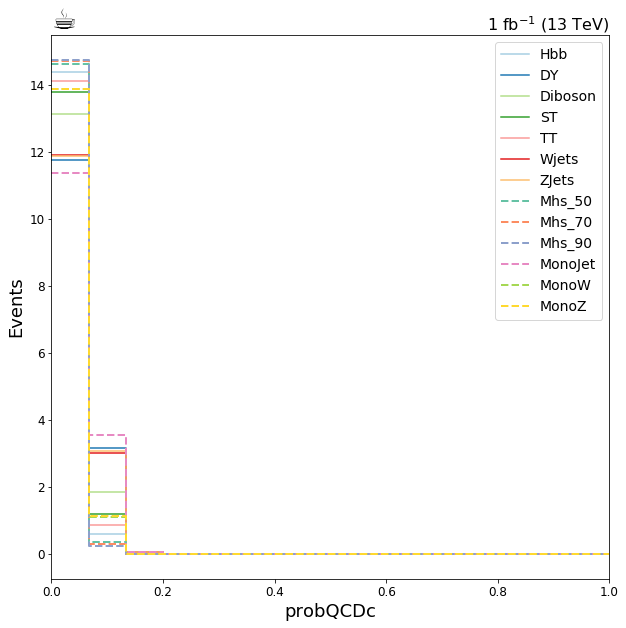

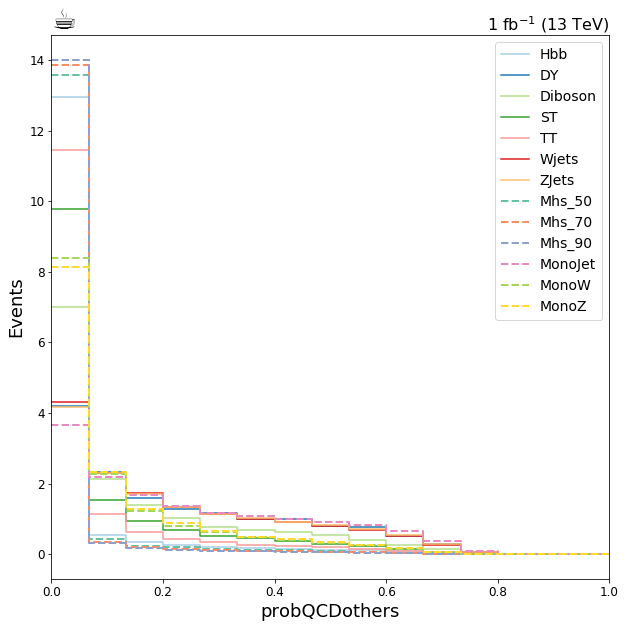

In [14]:
if not os.path.exists('unstack'):
    os.makedirs('unstack')


for key in hists.keys():
    if key=='sumw': continue
    
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    plot.plot1d(signal_hists[key].project('jet_selection','baggy').project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts=args,density=1)
    ax.autoscale(axis='x', tight=True)
    #ax.set_yscale('log')
    #ax.set_ylim(.01, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('unstack')
    plot_name = 'unstack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))